# Belief in Supernatural Evil and Guns

The purpose of this assignment is to attempt to replicate the follwing paper, which examines the relationship of belief in a supernatural evil metric (as well as of other variables) with some gun policies.

---

> Natalia Katsiapi, 810040 <br/>
> Department of Management Science and Technology <br/>
> Athens University of Economics and Business <br/>
> t8180040@aueb.gr

In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.formula.api import logit

from plotnine import *
%matplotlib inline
pd.set_option('display.max_columns', None)

The dataset is **Baylor Religion Survey, Wave IV (2014)** and was downloaded from [here](https://www.thearda.com/Archive/Files/Descriptions/BRS2014.asp).

In [2]:
df = pd.read_excel("Baylor Religion Survey, Wave IV (2014).XLSX", sheet_name=0)
print(df.shape)
df.head()

(1572, 282)


,MOTHERLODE_ID,PROJECT_ID,RESPONDENT_ID,METHOD_ID,METHOD_TYPE,PROJECT_NUMBER,CREATED_ON,PRACTICE,RESPONDENT_DATE,RESPONDENT_LANGUAGE,TEMPLATE_NUMBER_162048140,ENTITY_ID,SCAN_RESPONDENT_ID,AUTO_INCREMENT,CASEID,BATCH_ID,LANG1,Q1,Q2_DK,Q3,Q3_1,Q4,Q7,Q8,Q25,Q10,Q11,Q13A,Q13B,Q13C,Q13D,Q13E,Q13F,Q13G,Q13H,Q13I,Q13J,Q13K,Q13L,Q14A,Q14B,Q14C,Q14D,Q14E,Q14F,Q14G,Q17,Q18,Q9,Q19A,Q19B,Q19C,Q19D,Q19E,Q19F,Q20A,Q20B,Q20C,Q20D,Q20E,Q20F,Q20G,Q20H,Q21,Q23A,Q23B,Q23C,Q23D,Q23E,Q23F,Q23G,Q24A,Q24B,Q24C,Q24D,Q24E,Q24F,Q24G,Q26,Q27A,Q27B,Q27C,Q27D,Q27E,Q28A,Q28B,Q28C,Q29,Q30A,Q30B,Q30C,Q30D,Q30E,Q30F,Q30G,Q30H,Q30I,Q31,Q32,Q33,Q34,Q35,Q36A,Q36B,Q36C,Q36D,Q36E,Q36F,Q36G,Q37A,Q37B,Q37C,Q37D,Q37E,Q38,Q39A,Q39B,Q39C,Q39D,Q39E,Q39F,Q39G,Q39H,Q39I,Q40,Q41,Q42,Q43,Q44,Q45,Q46A,Q46B,Q46C,Q46D,Q47,Q48,Q50,Q50_DNA,Q51,Q51_DNA,Q51A,Q52,Q53,Q54,Q55,Q56A,Q56B,Q56C,Q57A,Q57B,Q57C,Q57D,Q58A,Q58B,Q58C,Q58D,Q58E,Q59A,Q59B,Q61A,Q61B,Q61C,Q61D,Q62,Q63,Q64A,Q64B,Q64C,Q64D,Q65A,Q65B,Q66A,Q66B,Q66C,Q66D,Q67A,Q67B,Q67C,Q67D,Q67E,Q68A,Q68B,Q68C,Q68D,Q68E,Q69A,Q69B,Q69C,Q69D,Q70A,Q70B,Q70C,Q70D,Q71A,Q71B,Q71C,Q71D,Q71E,Q71F,Q72,Q73A,Q73B,Q73C,Q73D,Q73E,Q73F,Q73G,Q73H,Q74_NO,Q74A,Q74B,Q74C,Q75A,Q75B,Q75C,Q75D,Q75E,Q75F,Q75G,Q75H,Q75_1A,Q75_1B,Q75_1C,Q76A,Q76B,Q76C,Q76D,Q76E,Q76F,Q76_1A,Q76_1B,Q76_1C,Q76_1D,Q76_1E,Q76_1F,Q76_1G,Q76_1H,Q77,Q78_M,Q78_Y,Q79,Q80,Q80A,Q81,Q83,Q84,Q85,Q86,Q87,Q87A,Q87B,Q88A,Q88B,Q88C,Q88D,Q88E,Q88F,Q89,Q90,Q91,Q91A,Q92,Q92_NONE,Q92A,Q93,Q93_NONE,Q94,Q95,BAYLOR_2014_LANGUAGE,AGE,AGE_VALID,STRATUM_KEY,STATE,PROJWT,WEIGHT,Q2,RELTRAD,I_GENDER,I_EDUC,I_MARITAL,I_RELIGION,I_ATTEND
0,128170892,33370,01_000001_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,162048140,4139835441,4139835441,1,1,1,en-US,20.0,NaN,4.0,4.0,8.0,5.0,1.0,3.0,5.0,8.0,2.0,4.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,NaN,1.0,3.0,1.0,1.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,1.0,4.0,4.0,4.0,4.0,1.0,4.0,4.0,4.0,1.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0,4.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,4.0,4.0,4.0,1.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,2.0,2.0,3.0,4.0,2.0,3.0,3.0,8.0,8.0,2.0,3.0,3.0,1.0,3.0,1.0,2.0,1.0,3.0,2.0,4.0,2.0,2.0,2.0,2.0,0.0,0.0,19.0,NaN,44.0,NaN,5.0,NaN,NaN,NaN,1.0,3.0,3.0,4.0,3.0,2.0,4.0,3.0,3.0,3.0,8.0,3.0,3.0,20.0,NaN,1.0,1.0,1.0,4.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0,1.0,0.0,1.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,5.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,3.0,1929.0,1.0,4.0,2.0,6.0,NaN,NaN,NaN,2.0,2.0,2.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0,3.0,2.0,3.0,NaN,21.0,NaN,1.0,3.0,2.0,1,85,1.0,42,TX,20086.696606,0.270000,Church of Christ,1.0,2.0,5.0,3.0,1.0,6.0
1,128170893,33370,01_000002_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,162048140,4139832983,4139832983,2,2,1,en-US,NaN,NaN,4.0,4.0,1.0,1.0,8.0,3.0,3.0,5.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,1.0,1.0,1.0,4.0,3.0,4.0,4.0,4.0,3.0,4.0,1.0,4.0,3.0,4.0,NaN,4.0,NaN,2.0,4.0,4.0,4.0,1.0,4.0,4.0,4.0,NaN,1.0,2.0,NaN,4.0,NaN,4.0,4.0,1.0,1.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,4.0,7.0,2.0,1.0,8.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,NaN,8.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,3.0,2.0,2.0,2.0,2.0,0.0,0.0,18.0,NaN,22.0,NaN,5.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,3.0,3.0,2.0,0.0,0.0,7.0,5.0,9.0,NaN,NaN,NaN,1.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,NaN,3.0,NaN,3.0,NaN,NaN,3.0,3.0,3.0,3.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,8.0,8.0,4.0,2.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,1.0,2.0,NaN,92.0,5.0,8.0,2.0,2.0,2.0,8.0,2.0,1.0,2.0,2.0,2.0,NaN,NaN,4.0,NaN,2.0,4.0,NaN,18.0,2.0,NaN,3.0,1.0,1,0,NaN,33,TX,26218.573175,0.35242

We will gain a general perspective of the data.

In [3]:
df.describe()

,MOTHERLODE_ID,PROJECT_ID,PROJECT_NUMBER,TEMPLATE_NUMBER_162048140,ENTITY_ID,SCAN_RESPONDENT_ID,AUTO_INCREMENT,CASEID,BATCH_ID,Q1,Q2_DK,Q3,Q3_1,Q4,Q7,Q8,Q25,Q10,Q11,Q13A,Q13B,Q13C,Q13D,Q13E,Q13F,Q13G,Q13H,Q13I,Q13J,Q13K,Q13L,Q14A,Q14B,Q14C,Q14D,Q14E,Q14F,Q14G,Q17,Q18,Q9,Q19A,Q19B,Q19C,Q19D,Q19E,Q19F,Q20A,Q20B,Q20C,Q20D,Q20E,Q20F,Q20G,Q20H,Q21,Q23A,Q23B,Q23C,Q23D,Q23E,Q23F,Q23G,Q24A,Q24B,Q24C,Q24D,Q24E,Q24F,Q24G,Q26,Q27A,Q27B,Q27C,Q27D,Q27E,Q28A,Q28B,Q28C,Q29,Q30A,Q30B,Q30C,Q30D,Q30E,Q30F,Q30G,Q30H,Q30I,Q31,Q32,Q33,Q34,Q35,Q36A,Q36B,Q36C,Q36D,Q36E,Q36F,Q36G,Q37A,Q37B,Q37C,Q37D,Q37E,Q38,Q39A,Q39B,Q39C,Q39D,Q39E,Q39F,Q39G,Q39H,Q39I,Q40,Q41,Q42,Q43,Q44,Q45,Q46A,Q46B,Q46C,Q46D,Q47,Q48,Q50,Q50_DNA,Q51,Q51_DNA,Q51A,Q52,Q53,Q54,Q55,Q56A,Q56B,Q56C,Q57A,Q57B,Q57C,Q57D,Q58A,Q58B,Q58C,Q58D,Q58E,Q59A,Q59B,Q61A,Q61B,Q61C,Q61D,Q62,Q63,Q64A,Q64B,Q64C,Q64D,Q65A,Q65B,Q66A,Q66B,Q66C,Q66D,Q67A,Q67B,Q67C,Q67D,Q67E,Q68A,Q68B,Q68C,Q68D,Q68E,Q69A,Q69B,Q69C,Q69D,Q70A,Q70B,Q70C,Q70D,Q71A,Q71B,Q71C,Q71D,Q71E,Q71F,Q72,Q73A,Q73B,Q73C,Q73D,Q73E,Q73F,Q73G,Q73H,Q74_NO,Q74A,Q74B,Q74C,Q75A,Q75B,Q75C,Q75D,Q75E,Q75F,Q75G,Q75H,Q75_1A,Q75_1B,Q75_1C,Q76A,Q76B,Q76C,Q76D,Q76E,Q76F,Q76_1A,Q76_1B,Q76_1C,Q76_1D,Q76_1E,Q76_1F,Q76_1G,Q76_1H,Q77,Q78_M,Q78_Y,Q79,Q80,Q80A,Q81,Q83,Q84,Q85,Q86,Q87,Q87A,Q87B,Q88A,Q88B,Q88C,Q88D,Q88E,Q88F,Q89,Q90,Q91,Q91A,Q92,Q92_NONE,Q92A,Q93,Q93_NONE,Q94,Q95,BAYLOR_2014_LANGUAGE,AGE,AGE_VALID,STRATUM_KEY,PROJWT,WEIGHT,RELTRAD,I_GENDER,I_EDUC,I_MARITAL,I_RELIGION,I_ATTEND
count,1.572000e+03,1572.000000,1572.0,1572.0,1.572000e+03,1.572000e+03,1572.000000,1572.000000,1572.000000,1550.000000,254.0,1553.000000,1553.000000,1556.000000,1143.000000,1147.000000,1549.000000,1551.000000,1540.000000,1496.000000,1480.000000,1462.000000,1458.000000,1487.000000,1460.000000,1460.000000,1462.000000,1462.000000,1465.000000,1472.000000,1467.000000,1513.000000,1476.000000,1464.000000,1469.000000,1456.000000,1467.000000,1468.000000,1549.000000,1554.000000,1108.000000,1373.000000,1267.000000,1264.000000,1291.000000,1285.000000,1289.000000,1323.000000,1263.000000,1334.000000,1273.000000,1321.000000,1256.000000,1357.000000,1271.000000,1408.000000,1504.000000,1524.000000,1499.000000,1454.000000,1432.000000,1509.000000,1492.000000,1440.000000,1436.000000,1441.000000,1455.000000,1454.000000,1440.000000,1455.000000,1527.000000,1498.000000,1500.00000,1517.000000,1504.000000,1514.000000,1521.000000,1535.000000,1517.000000,1516.000000,1534.000000,1521.000000,1521.000000,1519.000000,1519.000000,1520.000000,1519.000000,1518.000000,1548.000000,1521.000000,1521.000000,1542.000000,1527.000000,1535.000000,1532.000000,1524.000000,1447.000000,1523.000000,1526.000000,1529.000000,1516.000000,1520.000000,1492.000000,1521.000000,1488.000000,1514.000000,1486.000000,1512.000000,1514.000000,1507.000000,1513.000000,1513.000000,1517.000000,1511.000000,1516.000000,1512.000000,1517.000000,1541.000000,1508.000000,1538.000000,1540.000000,1544.000000,1541.000000,1532.000000,1532.000000,1531.000000,1557.000000,1557.000000,1188.000000,365.0,444.000000,1056.0,1554.000000,909.000000,916.000000,933.000000,1546.000000,1046.000000,1060.000000,1096.000000,1525.000000,1522.000000,1516.000000,1518.000000,1491.000000,1486.000000,1519.000000,1522.000000,1516.000000,1522.000000,1108.000000,1503.000000,1500.000000,1486.000000,1484.000000,1501.000000,1531.000000,952.000000,948.000000,949.000000,950.000000,920.000000,922.000000,929.000000,925.000000,929.000000,923.000000,945.000000,941.000000,944.000000,945.000000,949.000000,947.000000,943.000000,940.000000,941.000000,943.000000,946.000000,917.000000,919.000000,902.000000,1489.000000,1434.000000,1433.000000,1409.000000,1513.000000,1514.000000,1514.000000,1516.000000,1510.000000,1515.000000,1530.000000,1502.000000,1515.000000,1510.000000,1512.000000,1502.000000,1504.000000,1501.000000,1502.000000,945.0,467.000000,433.000000,233.000000,577.000000,574.000000,569.000000,564.000000,569.000000,565.000000,567.000000,565.000000,1528.000000,1521.000000,1523.000000,1520.

## Belief in Supernatural Evil Metric
Using the [codebook](https://www.thearda.com/Archive/Files/Codebooks/BRS2014_CB.asp) the questions needed for the metric are:

* Whether the respondent believes in the devil: Q23A

* Whether the respondent believes in hell: Q23C

* Whether the respondent believes in demons: Q23G
 

In [4]:
sup_evil = ['Q23A', 'Q23C', 'Q23G']
df[sup_evil].describe()

,Q23A,Q23C,Q23G
count,1504.000000,1499.000000,1492.000000
mean,3.149601,3.088726,3.016086
std,1.108048,1.114655,1.108353
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000
50%,4.000000,4.000000,3.000000
75%,4.000000,4.000000,4.000000
max,4.000000,4.000000,4.000000


The metric the paper or is the mean of the answers to this question for each respondent. We will create a helper dataframe with the useful for the analysis variables.

In [5]:
selected_vars = pd.DataFrame()
selected_vars["supernatural_evil"] = df[sup_evil].mean(axis=1)
selected_vars["supernatural_evil"].describe()

count    1517.000000
mean        3.089541
std         1.053424
min         1.000000
25%         2.333333
50%         3.666667
75%         4.000000
max         4.000000
Name: supernatural_evil, dtype: float64

The overall mean indeed agrees with that of the paper.

In [6]:
df[sup_evil].mean(axis=1).mean()

3.08954076027247

To justify our choice to calculate the metric this way, we will use PCA, but first, in order for it to work, we will impute Nans.

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df[sup_evil] = imp.fit_transform(df[sup_evil])

scaler = StandardScaler()
X_s = scaler.fit_transform(df[sup_evil])
pca = PCA(n_components=1)
df['supernatural_evil'] = pca.fit_transform(X_s)
print(f'explained variance ratio: {pca.explained_variance_ratio_}')

explained variance ratio: [0.8976102]


The explained variance is high, thus projecting the answers of 3 questions to one metric is effective.

In [8]:
pca.components_

array([[-0.58620261, -0.57641524, -0.56930833]])

Thus, the supernatural evil metric is calculated for each respondent as follows:

$$y = -0.58620261 \times x_1 - 0.57641524 \times x_2 -0.56930833 \times x_3 $$


In the above: $x1$ is `Q23A` (devil), $x2$ is `Q23C` (hell) and $x3$ is `Q23G` (evil).
We can conclude that mean is a suitable measure, since the 3 weights are similar. Thus, there is no need to put different weights on the 3 variables, for example double results of `Q23A` and each variable equally contributes to the metric.

## Variables Selection


We will start by encoding the dependent variables' results to 0 and 1.

In [9]:
dependent_variables = ["semi_auto_guns", "ammo_clips", "handguns", "carry_laws", \
    "school_security", "teachers_guns", "gun_safety", "mental_health_screening"]
selected_vars[dependent_variables] = df[["Q73A", "Q73E", "Q73G", "Q73H", "Q73C",\
     "Q73F", "Q73B", "Q73D"]].apply(lambda x: x.map({1: 1, 2: 0}))
selected_vars[dependent_variables].describe()

,semi_auto_guns,ammo_clips,handguns,carry_laws,school_security,teachers_guns,gun_safety,mental_health_screening
count,1502.000000,1502.000000,1501.000000,1502.000000,1510.000000,1504.000000,1515.000000,1512.000000
mean,0.629161,0.671105,0.290473,0.557923,0.621854,0.294548,0.927393,0.908069
std,0.483190,0.469968,0.454132,0.496799,0.485085,0.455991,0.259576,0.289024
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We wil move on to the independent variables. Each of them is either scale or categorical, thus some need to be converted to dummies in order to continue with the analysis. 2 groups are created, since we will perform regression with each of them as the paper did. Also, an attempt was made to have variable descriptives close with the paper's variables.

In [10]:
independent_variables1 = ["supernatural_evil", "attendance", "biblical_inerrancy", "biblical_literalism", \
    "mainline_protestant", "black_protestant", "conservative_protestant", "catholic", "other_religion"]
independent_variables2 = independent_variables1 + ["political_ideology", "age", "female", "non_hisp_black", "hispanic", "other_race", \
    "less_than_hs", "some_college", "college_graduate", "postgraduate", "income", "married", "children", \
    "urban", "south"]
independent_variables2

['supernatural_evil',
 'attendance',
 'biblical_inerrancy',
 'biblical_literalism',
 'mainline_protestant',
 'black_protestant',
 'conservative_protestant',
 'catholic',
 'other_religion',
 'political_ideology',
 'age',
 'female',
 'non_hisp_black',
 'hispanic',
 'other_race',
 'less_than_hs',
 'some_college',
 'college_graduate',
 'postgraduate',
 'income',
 'married',
 'children',
 'urban',
 'south']

Attendance does not need special handling, thus we take it as it is.

In [11]:
selected_vars['attendance'] = df["Q4"]
selected_vars['attendance'].describe()

count    1556.000000
mean        3.676735
std         2.932510
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max         8.000000
Name: attendance, dtype: float64

Bible errors and history-legends are treated as one value, thus we map them to 3, including the missing values.

In [12]:
df['Q17'] = df['Q17'].map({4: 3, 8: 3, 2: 1, 1: 1, 2: 2, 3: 3, np.nan: 3})
df['Q17'].value_counts() / df['Q17'].count()

3    0.440840
2    0.333333
1    0.225827
Name: Q17, dtype: float64

We then create the dummies. We do not use `dropFirst=True`, since we keep `biblical_literalism` variable.

In [13]:
df = pd.get_dummies(df, columns=["Q17"])
df.describe()

,MOTHERLODE_ID,PROJECT_ID,PROJECT_NUMBER,TEMPLATE_NUMBER_162048140,ENTITY_ID,SCAN_RESPONDENT_ID,AUTO_INCREMENT,CASEID,BATCH_ID,Q1,Q2_DK,Q3,Q3_1,Q4,Q7,Q8,Q25,Q10,Q11,Q13A,Q13B,Q13C,Q13D,Q13E,Q13F,Q13G,Q13H,Q13I,Q13J,Q13K,Q13L,Q14A,Q14B,Q14C,Q14D,Q14E,Q14F,Q14G,Q18,Q9,Q19A,Q19B,Q19C,Q19D,Q19E,Q19F,Q20A,Q20B,Q20C,Q20D,Q20E,Q20F,Q20G,Q20H,Q21,Q23A,Q23B,Q23C,Q23D,Q23E,Q23F,Q23G,Q24A,Q24B,Q24C,Q24D,Q24E,Q24F,Q24G,Q26,Q27A,Q27B,Q27C,Q27D,Q27E,Q28A,Q28B,Q28C,Q29,Q30A,Q30B,Q30C,Q30D,Q30E,Q30F,Q30G,Q30H,Q30I,Q31,Q32,Q33,Q34,Q35,Q36A,Q36B,Q36C,Q36D,Q36E,Q36F,Q36G,Q37A,Q37B,Q37C,Q37D,Q37E,Q38,Q39A,Q39B,Q39C,Q39D,Q39E,Q39F,Q39G,Q39H,Q39I,Q40,Q41,Q42,Q43,Q44,Q45,Q46A,Q46B,Q46C,Q46D,Q47,Q48,Q50,Q50_DNA,Q51,Q51_DNA,Q51A,Q52,Q53,Q54,Q55,Q56A,Q56B,Q56C,Q57A,Q57B,Q57C,Q57D,Q58A,Q58B,Q58C,Q58D,Q58E,Q59A,Q59B,Q61A,Q61B,Q61C,Q61D,Q62,Q63,Q64A,Q64B,Q64C,Q64D,Q65A,Q65B,Q66A,Q66B,Q66C,Q66D,Q67A,Q67B,Q67C,Q67D,Q67E,Q68A,Q68B,Q68C,Q68D,Q68E,Q69A,Q69B,Q69C,Q69D,Q70A,Q70B,Q70C,Q70D,Q71A,Q71B,Q71C,Q71D,Q71E,Q71F,Q72,Q73A,Q73B,Q73C,Q73D,Q73E,Q73F,Q73G,Q73H,Q74_NO,Q74A,Q74B,Q74C,Q75A,Q75B,Q75C,Q75D,Q75E,Q75F,Q75G,Q75H,Q75_1A,Q75_1B,Q75_1C,Q76A,Q76B,Q76C,Q76D,Q76E,Q76F,Q76_1A,Q76_1B,Q76_1C,Q76_1D,Q76_1E,Q76_1F,Q76_1G,Q76_1H,Q77,Q78_M,Q78_Y,Q79,Q80,Q80A,Q81,Q83,Q84,Q85,Q86,Q87,Q87A,Q87B,Q88A,Q88B,Q88C,Q88D,Q88E,Q88F,Q89,Q90,Q91,Q91A,Q92,Q92_NONE,Q92A,Q93,Q93_NONE,Q94,Q95,BAYLOR_2014_LANGUAGE,AGE,AGE_VALID,STRATUM_KEY,PROJWT,WEIGHT,RELTRAD,I_GENDER,I_EDUC,I_MARITAL,I_RELIGION,I_ATTEND,supernatural_evil,Q17_1,Q17_2,Q17_3
count,1.572000e+03,1572.000000,1572.0,1572.0,1.572000e+03,1.572000e+03,1572.000000,1572.000000,1572.000000,1550.000000,254.0,1553.000000,1553.000000,1556.000000,1143.000000,1147.000000,1549.000000,1551.000000,1540.000000,1496.000000,1480.000000,1462.000000,1458.000000,1487.000000,1460.000000,1460.000000,1462.000000,1462.000000,1465.000000,1472.000000,1467.000000,1513.000000,1476.000000,1464.000000,1469.000000,1456.000000,1467.000000,1468.000000,1554.000000,1108.000000,1373.000000,1267.000000,1264.000000,1291.000000,1285.000000,1289.000000,1323.000000,1263.000000,1334.000000,1273.000000,1321.000000,1256.000000,1357.000000,1271.000000,1408.000000,1572.000000,1524.000000,1572.000000,1454.000000,1432.000000,1509.000000,1572.000000,1440.000000,1436.000000,1441.000000,1455.000000,1454.000000,1440.000000,1455.000000,1527.000000,1498.000000,1500.00000,1517.000000,1504.000000,1514.000000,1521.000000,1535.000000,1517.000000,1516.000000,1534.000000,1521.000000,1521.000000,1519.000000,1519.000000,1520.000000,1519.000000,1518.000000,1548.000000,1521.000000,1521.000000,1542.000000,1527.000000,1535.000000,1532.000000,1524.000000,1447.000000,1523.000000,1526.000000,1529.000000,1516.000000,1520.000000,1492.000000,1521.000000,1488.000000,1514.000000,1486.000000,1512.000000,1514.000000,1507.000000,1513.000000,1513.000000,1517.000000,1511.000000,1516.000000,1512.000000,1517.000000,1541.000000,1508.000000,1538.000000,1540.000000,1544.000000,1541.000000,1532.000000,1532.000000,1531.000000,1557.000000,1557.000000,1188.000000,365.0,444.000000,1056.0,1554.000000,909.000000,916.000000,933.000000,1546.000000,1046.000000,1060.000000,1096.000000,1525.000000,1522.000000,1516.000000,1518.000000,1491.000000,1486.000000,1519.000000,1522.000000,1516.000000,1522.000000,1108.000000,1503.000000,1500.000000,1486.000000,1484.000000,1501.000000,1531.000000,952.000000,948.000000,949.000000,950.000000,920.000000,922.000000,929.000000,925.000000,929.000000,923.000000,945.000000,941.000000,944.000000,945.000000,949.000000,947.000000,943.000000,940.000000,941.000000,943.000000,946.000000,917.000000,919.000000,902.000000,1489.000000,1434.000000,1433.000000,1409.000000,1513.000000,1514.000000,1514.000000,1516.000000,1510.000000,1515.000000,1530.000000,1502.000000,1515.000000,1510.000000,1512.000000,1502.000000,1504.000000,1501.000000,1502.000000,945.0,467.000000,433.000000,233.000000,577.000000,574.000000,569.000000,564.000000,569.000000,565.000000,567.000000,565.000000,1528.000000,1521.0000

And then keep then in helper DataFrame.

In [14]:
selected_vars[["biblical_inerrancy", "biblical_literalism"]] = df[["Q17_2", "Q17_1"]]
selected_vars[["biblical_inerrancy", "biblical_literalism"]].describe()

,biblical_inerrancy,biblical_literalism
count,1572.000000,1572.000000
mean,0.333333,0.225827
std,0.471555,0.418259
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


Now we will move to religion and gain the current percentages of values

In [15]:
df["RELTRAD"].value_counts() / df["RELTRAD"].count()

1.0    0.284267
4.0    0.249156
2.0    0.168805
7.0    0.144497
3.0    0.071573
6.0    0.059419
5.0    0.022282
Name: RELTRAD, dtype: float64

Jewish people and other religions should be grouped to match paper's descriptives.

In [16]:
df['RELTRAD'] = df['RELTRAD'].map({1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 5, 7: 7})
df["RELTRAD"].value_counts() / df["RELTRAD"].count()

1.0    0.284267
4.0    0.249156
2.0    0.168805
7.0    0.144497
5.0    0.081702
3.0    0.071573
Name: RELTRAD, dtype: float64

We then create dummies.

In [17]:
df = pd.get_dummies(df, columns=["RELTRAD"])
df.describe()

,MOTHERLODE_ID,PROJECT_ID,PROJECT_NUMBER,TEMPLATE_NUMBER_162048140,ENTITY_ID,SCAN_RESPONDENT_ID,AUTO_INCREMENT,CASEID,BATCH_ID,Q1,Q2_DK,Q3,Q3_1,Q4,Q7,Q8,Q25,Q10,Q11,Q13A,Q13B,Q13C,Q13D,Q13E,Q13F,Q13G,Q13H,Q13I,Q13J,Q13K,Q13L,Q14A,Q14B,Q14C,Q14D,Q14E,Q14F,Q14G,Q18,Q9,Q19A,Q19B,Q19C,Q19D,Q19E,Q19F,Q20A,Q20B,Q20C,Q20D,Q20E,Q20F,Q20G,Q20H,Q21,Q23A,Q23B,Q23C,Q23D,Q23E,Q23F,Q23G,Q24A,Q24B,Q24C,Q24D,Q24E,Q24F,Q24G,Q26,Q27A,Q27B,Q27C,Q27D,Q27E,Q28A,Q28B,Q28C,Q29,Q30A,Q30B,Q30C,Q30D,Q30E,Q30F,Q30G,Q30H,Q30I,Q31,Q32,Q33,Q34,Q35,Q36A,Q36B,Q36C,Q36D,Q36E,Q36F,Q36G,Q37A,Q37B,Q37C,Q37D,Q37E,Q38,Q39A,Q39B,Q39C,Q39D,Q39E,Q39F,Q39G,Q39H,Q39I,Q40,Q41,Q42,Q43,Q44,Q45,Q46A,Q46B,Q46C,Q46D,Q47,Q48,Q50,Q50_DNA,Q51,Q51_DNA,Q51A,Q52,Q53,Q54,Q55,Q56A,Q56B,Q56C,Q57A,Q57B,Q57C,Q57D,Q58A,Q58B,Q58C,Q58D,Q58E,Q59A,Q59B,Q61A,Q61B,Q61C,Q61D,Q62,Q63,Q64A,Q64B,Q64C,Q64D,Q65A,Q65B,Q66A,Q66B,Q66C,Q66D,Q67A,Q67B,Q67C,Q67D,Q67E,Q68A,Q68B,Q68C,Q68D,Q68E,Q69A,Q69B,Q69C,Q69D,Q70A,Q70B,Q70C,Q70D,Q71A,Q71B,Q71C,Q71D,Q71E,Q71F,Q72,Q73A,Q73B,Q73C,Q73D,Q73E,Q73F,Q73G,Q73H,Q74_NO,Q74A,Q74B,Q74C,Q75A,Q75B,Q75C,Q75D,Q75E,Q75F,Q75G,Q75H,Q75_1A,Q75_1B,Q75_1C,Q76A,Q76B,Q76C,Q76D,Q76E,Q76F,Q76_1A,Q76_1B,Q76_1C,Q76_1D,Q76_1E,Q76_1F,Q76_1G,Q76_1H,Q77,Q78_M,Q78_Y,Q79,Q80,Q80A,Q81,Q83,Q84,Q85,Q86,Q87,Q87A,Q87B,Q88A,Q88B,Q88C,Q88D,Q88E,Q88F,Q89,Q90,Q91,Q91A,Q92,Q92_NONE,Q92A,Q93,Q93_NONE,Q94,Q95,BAYLOR_2014_LANGUAGE,AGE,AGE_VALID,STRATUM_KEY,PROJWT,WEIGHT,I_GENDER,I_EDUC,I_MARITAL,I_RELIGION,I_ATTEND,supernatural_evil,Q17_1,Q17_2,Q17_3,RELTRAD_1.0,RELTRAD_2.0,RELTRAD_3.0,RELTRAD_4.0,RELTRAD_5.0,RELTRAD_7.0
count,1.572000e+03,1572.000000,1572.0,1572.0,1.572000e+03,1.572000e+03,1572.000000,1572.000000,1572.000000,1550.000000,254.0,1553.000000,1553.000000,1556.000000,1143.000000,1147.000000,1549.000000,1551.000000,1540.000000,1496.000000,1480.000000,1462.000000,1458.000000,1487.000000,1460.000000,1460.000000,1462.000000,1462.000000,1465.000000,1472.000000,1467.000000,1513.000000,1476.000000,1464.000000,1469.000000,1456.000000,1467.000000,1468.000000,1554.000000,1108.000000,1373.000000,1267.000000,1264.000000,1291.000000,1285.000000,1289.000000,1323.000000,1263.000000,1334.000000,1273.000000,1321.000000,1256.000000,1357.000000,1271.000000,1408.000000,1572.000000,1524.000000,1572.000000,1454.000000,1432.000000,1509.000000,1572.000000,1440.000000,1436.000000,1441.000000,1455.000000,1454.000000,1440.000000,1455.000000,1527.000000,1498.000000,1500.00000,1517.000000,1504.000000,1514.000000,1521.000000,1535.000000,1517.000000,1516.000000,1534.000000,1521.000000,1521.000000,1519.000000,1519.000000,1520.000000,1519.000000,1518.000000,1548.000000,1521.000000,1521.000000,1542.000000,1527.000000,1535.000000,1532.000000,1524.000000,1447.000000,1523.000000,1526.000000,1529.000000,1516.000000,1520.000000,1492.000000,1521.000000,1488.000000,1514.000000,1486.000000,1512.000000,1514.000000,1507.000000,1513.000000,1513.000000,1517.000000,1511.000000,1516.000000,1512.000000,1517.000000,1541.000000,1508.000000,1538.000000,1540.000000,1544.000000,1541.000000,1532.000000,1532.000000,1531.000000,1557.000000,1557.000000,1188.000000,365.0,444.000000,1056.0,1554.000000,909.000000,916.000000,933.000000,1546.000000,1046.000000,1060.000000,1096.000000,1525.000000,1522.000000,1516.000000,1518.000000,1491.000000,1486.000000,1519.000000,1522.000000,1516.000000,1522.000000,1108.000000,1503.000000,1500.000000,1486.000000,1484.000000,1501.000000,1531.000000,952.000000,948.000000,949.000000,950.000000,920.000000,922.000000,929.000000,925.000000,929.000000,923.000000,945.000000,941.000000,944.000000,945.000000,949.000000,947.000000,943.000000,940.000000,941.000000,943.000000,946.000000,917.000000,919.000000,902.000000,1489.000000,1434.000000,1433.000000,1409.000000,1513.000000,1514.000000,1514.000000,1516.000000,1510.000000,1515.000000,1530.000000,1502.000000,1515.000000,1510.000000,1512.000000,1502.000000,1504.000000,1501.000000,1502.000000,945.0,467.000000,433.000000,233.000000,577.000000,574.000000,569.000000,564.000000,5

We do not keep no affiliation.

In [18]:
selected_vars[["mainline_protestant", "black_protestant", \
    "conservative_protestant", "catholic", "other_religion"]] = df[["RELTRAD_2.0", \
    "RELTRAD_3.0", "RELTRAD_1.0", "RELTRAD_4.0", "RELTRAD_5.0"]]
selected_vars[["mainline_protestant", "black_protestant", \
    "conservative_protestant", "catholic", "other_religion"]].describe()

,mainline_protestant,black_protestant,conservative_protestant,catholic,other_religion
count,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000
mean,0.159033,0.067430,0.267812,0.234733,0.076972
std,0.365823,0.250845,0.442960,0.423967,0.266632
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


We move to political ideology.

In [19]:
df['Q31'].describe()

count    1521.000000
mean        3.800789
std         1.554416
min         1.000000
25%         2.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: Q31, dtype: float64

It is close so we will pass it directly to the other dataframe.

In [20]:
selected_vars['political_ideology'] = df['Q31']
selected_vars.political_ideology

0       1.0
1       4.0
2       6.0
3       2.0
4       2.0
       ... 
1567    3.0
1568    4.0
1569    4.0
1570    6.0
1571    NaN
Name: political_ideology, Length: 1572, dtype: float64

In [21]:
df["AGE"].describe()

count    1572.000000
mean       49.162214
std        21.018613
min         0.000000
25%        35.000000
50%        52.000000
75%        64.000000
max        99.000000
Name: AGE, dtype: float64

We will do the same for age.

In [22]:
selected_vars['age'] = df['AGE']
selected_vars.age

0       85
1        0
2       67
3       64
4       54
        ..
1567    48
1568    59
1569    29
1570    57
1571     0
Name: age, Length: 1572, dtype: int64

For gender, we only neet to map 1 & 2 to 0 (male) & 1 (female).

In [23]:
df['Q77'] = df['Q77'].map({2: 1, 1: 0})
df["Q77"].value_counts() / df["Q77"].count()

1.0    0.578776
0.0    0.421224
Name: Q77, dtype: float64

Dummy is ready, so we will pass it to `selected_vars`.

In [24]:
selected_vars["female"] = df["Q77"]
selected_vars["female"].describe()

count    1536.000000
mean        0.578776
std         0.493916
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: female, dtype: float64

Race emerges from several questions. We will encode whites to see if descriptives agree with the paper, although they will not be further used in the analysis.

In [25]:
mapping = {
    1: 1,
    2: 0,
    np.nan: 0
}
df["Q88A"] = df["Q88A"].map(mapping) 
df["Q88A"].value_counts() / df["Q88A"].count()

1    0.746183
0    0.253817
Name: Q88A, dtype: float64

Continuing with blacks.

In [26]:
df["Q88B"] = df["Q88B"].map(mapping)
selected_vars['non_hisp_black'] = df["Q88B"]
df["Q88B"].value_counts() / df["Q88B"].count()

0    0.886132
1    0.113868
Name: Q88B, dtype: float64

And for hispanics, we will map specific hispanic races to hispanic.

In [27]:
df["Q89"] = df["Q89"].map({1: 0, 2: 1, 3: 1, 4: 1, 5: 1, 8: 1, np.nan: 0})
selected_vars['hispanic'] = df["Q89"]
df["Q89"].value_counts() / df["Q89"].count()

0    0.877863
1    0.122137
Name: Q89, dtype: float64

Others will be calculated as people who do not belong to the previous races.

In [28]:
df.loc[(df["Q88A"] == 0) & (df["Q88B"] == 0) & (df["Q89"] == 0), "other"] = 1
df.loc[(df["Q88A"] == 1) | (df["Q88B"] == 1) | (df["Q89"] == 1), "other"] = 0
selected_vars['other_race'] = df["other"]
selected_vars.describe()

,supernatural_evil,semi_auto_guns,ammo_clips,handguns,carry_laws,school_security,teachers_guns,gun_safety,mental_health_screening,attendance,biblical_inerrancy,biblical_literalism,mainline_protestant,black_protestant,conservative_protestant,catholic,other_religion,political_ideology,age,female,non_hisp_black,hispanic,other_race
count,1517.000000,1502.000000,1502.000000,1501.000000,1502.000000,1510.000000,1504.000000,1515.000000,1512.000000,1556.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1521.000000,1572.000000,1536.000000,1572.000000,1572.000000,1572.000000
mean,3.089541,0.629161,0.671105,0.290473,0.557923,0.621854,0.294548,0.927393,0.908069,3.676735,0.333333,0.225827,0.159033,0.067430,0.267812,0.234733,0.076972,3.800789,49.162214,0.578776,0.113868,0.122137,0.087150
std,1.053424,0.483190,0.469968,0.454132,0.496799,0.485085,0.455991,0.259576,0.289024,2.932510,0.471555,0.418259,0.365823,0.250845,0.442960,0.423967,0.266632,1.554416,21.018613,0.493916,0.317752,0.327549,0.282145
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,35.000000,0.000000,0.000000,0.000000,0.000000
50%,3.666667,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,52.000000,1.000000,0.000000,0.000000,0.000000
75%,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.000000,64.000000,1.000000,0.000000,0.000000,0.000000
max,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,99.000000,1.000000,1.000000,1.000000,1.000000


Moving on to education, _Trade/Technical/Vocational training_ will be mapped together with _Some college_, since this results in closer to the paper's descriptives. 

In [29]:
df["I_EDUC"] = df["I_EDUC"].map({
                            1: 1,
                            2: 2,
                            3: 3,
                            4: 3,
                            5: 5,
                            6: 6
                        })

df["I_EDUC"].value_counts() / df["I_EDUC"].count()

3.0    0.321785
5.0    0.261825
6.0    0.223185
2.0    0.133911
1.0    0.059294
Name: I_EDUC, dtype: float64

We will now create dummies

In [30]:
df = pd.get_dummies(df, columns=["I_EDUC"])
df

,MOTHERLODE_ID,PROJECT_ID,RESPONDENT_ID,METHOD_ID,METHOD_TYPE,PROJECT_NUMBER,CREATED_ON,PRACTICE,RESPONDENT_DATE,RESPONDENT_LANGUAGE,TEMPLATE_NUMBER_162048140,ENTITY_ID,SCAN_RESPONDENT_ID,AUTO_INCREMENT,CASEID,BATCH_ID,LANG1,Q1,Q2_DK,Q3,Q3_1,Q4,Q7,Q8,Q25,Q10,Q11,Q13A,Q13B,Q13C,Q13D,Q13E,Q13F,Q13G,Q13H,Q13I,Q13J,Q13K,Q13L,Q14A,Q14B,Q14C,Q14D,Q14E,Q14F,Q14G,Q18,Q9,Q19A,Q19B,Q19C,Q19D,Q19E,Q19F,Q20A,Q20B,Q20C,Q20D,Q20E,Q20F,Q20G,Q20H,Q21,Q23A,Q23B,Q23C,Q23D,Q23E,Q23F,Q23G,Q24A,Q24B,Q24C,Q24D,Q24E,Q24F,Q24G,Q26,Q27A,Q27B,Q27C,Q27D,Q27E,Q28A,Q28B,Q28C,Q29,Q30A,Q30B,Q30C,Q30D,Q30E,Q30F,Q30G,Q30H,Q30I,Q31,Q32,Q33,Q34,Q35,Q36A,Q36B,Q36C,Q36D,Q36E,Q36F,Q36G,Q37A,Q37B,Q37C,Q37D,Q37E,Q38,Q39A,Q39B,Q39C,Q39D,Q39E,Q39F,Q39G,Q39H,Q39I,Q40,Q41,Q42,Q43,Q44,Q45,Q46A,Q46B,Q46C,Q46D,Q47,Q48,Q50,Q50_DNA,Q51,Q51_DNA,Q51A,Q52,Q53,Q54,Q55,Q56A,Q56B,Q56C,Q57A,Q57B,Q57C,Q57D,Q58A,Q58B,Q58C,Q58D,Q58E,Q59A,Q59B,Q61A,Q61B,Q61C,Q61D,Q62,Q63,Q64A,Q64B,Q64C,Q64D,Q65A,Q65B,Q66A,Q66B,Q66C,Q66D,Q67A,Q67B,Q67C,Q67D,Q67E,Q68A,Q68B,Q68C,Q68D,Q68E,Q69A,Q69B,Q69C,Q69D,Q70A,Q70B,Q70C,Q70D,Q71A,Q71B,Q71C,Q71D,Q71E,Q71F,Q72,Q73A,Q73B,Q73C,Q73D,Q73E,Q73F,Q73G,Q73H,Q74_NO,Q74A,Q74B,Q74C,Q75A,Q75B,Q75C,Q75D,Q75E,Q75F,Q75G,Q75H,Q75_1A,Q75_1B,Q75_1C,Q76A,Q76B,Q76C,Q76D,Q76E,Q76F,Q76_1A,Q76_1B,Q76_1C,Q76_1D,Q76_1E,Q76_1F,Q76_1G,Q76_1H,Q77,Q78_M,Q78_Y,Q79,Q80,Q80A,Q81,Q83,Q84,Q85,Q86,Q87,Q87A,Q87B,Q88A,Q88B,Q88C,Q88D,Q88E,Q88F,Q89,Q90,Q91,Q91A,Q92,Q92_NONE,Q92A,Q93,Q93_NONE,Q94,Q95,BAYLOR_2014_LANGUAGE,AGE,AGE_VALID,STRATUM_KEY,STATE,PROJWT,WEIGHT,Q2,I_GENDER,I_MARITAL,I_RELIGION,I_ATTEND,supernatural_evil,Q17_1,Q17_2,Q17_3,RELTRAD_1.0,RELTRAD_2.0,RELTRAD_3.0,RELTRAD_4.0,RELTRAD_5.0,RELTRAD_7.0,other,I_EDUC_1.0,I_EDUC_2.0,I_EDUC_3.0,I_EDUC_5.0,I_EDUC_6.0
0,128170892,33370,01_000001_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,162048140,4139835441,4139835441,1,1,1,en-US,20.0,NaN,4.0,4.0,8.0,5.0,1.0,3.0,5.0,8.0,2.0,4.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,NaN,1.0,3.0,1.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.000000,4.0,4.000000,1.0,4.0,4.0,4.000000,4.0,1.0,4.0,4.0,4.0,1.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0,4.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,4.0,4.0,4.0,1.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,2.0,2.0,3.0,4.0,2.0,3.0,3.0,8.0,8.0,2.0,3.0,3.0,1.0,3.0,1.0,2.0,1.0,3.0,2.0,4.0,2.0,2.0,2.0,2.0,0.0,0.0,19.0,NaN,44.0,NaN,5.0,NaN,NaN,NaN,1.0,3.0,3.0,4.0,3.0,2.0,4.0,3.0,3.0,3.0,8.0,3.0,3.0,20.0,NaN,1.0,1.0,1.0,4.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0,1.0,0.0,1.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,5.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,3.0,1929.0,1.0,4.0,2.0,6.0,NaN,NaN,NaN,2.0,2.0,2.0,8.0,0,0,NaN,NaN,NaN,NaN,0,6.0,3.0,2.0,3.0,NaN,21.0,NaN,1.0,3.0,2.0,1,85,1.0,42,TX,20086.696606,0.270000,Church of Christ,2.0,3.0,1.0,6.0,-1.461784e+00,1,0,0,1,0,0,0,0,0,1.0,0,0,0,1,0
1,128170893,33370,01_000002_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,162048140,4139832983,4139832983,2,2,1,en-US,NaN,NaN,4.0,4.0,1.0,1.0,8.0,3.0,3.0,5.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,1.0,1.0,4.0,3.0,4.0,4.0,4.0,3.0,4.0,1.0,4.0,3.0,4.0,NaN,4.0,NaN,2.0,4.000000,4.0,4.000000,1.0,4.0,4.0,4.000000,NaN,1.0,2.0,NaN,4.0,NaN,4.0,4.0,1.0,1.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,4.0,7.0,2.0,1.0,8.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,NaN,8.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,3.0,2.0,2.0,2.0,2.0,0.0,0.0,18.0,NaN,22.0,NaN,5.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,3.0,3.0,2.0,0.0,0.0,7.0,5.0,9.0,NaN,NaN,NaN,1.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,NaN,3.0,NaN,3.0,NaN,NaN,3.0,3.0,3.0,3.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,8.0,8.0,4.0,2.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,2.0,NaN,NaN,NaN,

We will ommit column `I_EDUC_2.0` (high school graduate).

In [31]:
selected_vars[["less_than_hs", "some_college", "college_graduate", "postgraduate"]] = df[["I_EDUC_1.0", "I_EDUC_3.0", "I_EDUC_5.0", "I_EDUC_6.0"]]
selected_vars[["less_than_hs", "some_college", "college_graduate", "postgraduate"]].describe()

,less_than_hs,some_college,college_graduate,postgraduate
count,1572.000000,1572.000000,1572.00000,1572.000000
mean,0.056616,0.307252,0.25000,0.213104
std,0.231181,0.461502,0.43315,0.409631
min,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,0.00000,0.000000
75%,0.000000,1.000000,0.25000,0.000000
max,1.000000,1.000000,1.00000,1.000000


Income does not need any processing.

In [32]:
selected_vars["income"] = df['Q95']
selected_vars['income'].describe()

count    1467.000000
mean        4.151329
std         1.707939
min         1.000000
25%         3.000000
50%         5.000000
75%         5.000000
max         7.000000
Name: income, dtype: float64

Moving on to marriage.

In [33]:
df['Q51A'].value_counts() / df['Q51A'].count()

2.0    0.513514
1.0    0.198842
5.0    0.139640
6.0    0.084942
3.0    0.039254
4.0    0.023810
Name: Q51A, dtype: float64

_Married_ and _Living as married/partnered_ will only be considered as married.

In [34]:
mapping = {
    1: 0,
    2: 1,
    3: 1,
    4: 0,
    5: 0,
    6: 0
}
selected_vars['married'] = df['Q51A'].map(mapping)
selected_vars['married'].describe()

count    1554.000000
mean        0.552767
std         0.497368
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: married, dtype: float64

We are only interested in whether or not exist children at home and not in how many.

In [35]:
selected_vars['children'] = df['Q93'].apply(lambda x: 1 if x > 0 else 0)
selected_vars.children.describe()

count    1572.000000
mean        0.254453
std         0.435692
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: children, dtype: float64

Cotinuing with region.

In [36]:
df['Q80'].value_counts() / df['Q80'].count()

3.0    0.330519
2.0    0.270130
1.0    0.250649
4.0    0.135714
8.0    0.012987
Name: Q80, dtype: float64

Only _A large city_ and _A suburb near a large city_ are mapped as urban.

In [37]:
mapping = {
    1: 1,
    2: 1,
    3: 0,
    4: 0,
    8: 0
}
selected_vars['urban'] = df['Q80'].map(mapping)
selected_vars['urban'].describe()

count    1540.000000
mean        0.520779
std         0.499730
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: urban, dtype: float64

Finally, we have an abbreviation for the state where people live.

In [38]:
df['STATE']

0       TX
1       TX
2       ND
3       TX
4       IA
        ..
1567    CA
1568    CA
1569    CA
1570    CT
1571    GA
Name: STATE, Length: 1572, dtype: object

Using the following links, we find and map the southern states.
* https://www.bls.gov/respondents/mwr/electronic-data-interchange/appendix-d-usps-state-abbreviations-and-fips-codes.htm
* https://en.wikipedia.org/wiki/Southern_United_States

In [39]:
southern_states = ['TX', 'FL', 'GA', 'NC', 'VA', 'TN', 'MD', 'SC', 'AL', 'LA', \
    'KY', 'OK', 'AR', 'MS', 'WV', 'DE']
selected_vars['south'] = df['STATE'].apply(lambda x: 1 if x in southern_states else 0)
selected_vars['south'].describe()

count    1572.000000
mean        0.382952
std         0.486261
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: south, dtype: float64

The variables that will be used are the following:

In [40]:
selected_vars.describe()

,supernatural_evil,semi_auto_guns,ammo_clips,handguns,carry_laws,school_security,teachers_guns,gun_safety,mental_health_screening,attendance,biblical_inerrancy,biblical_literalism,mainline_protestant,black_protestant,conservative_protestant,catholic,other_religion,political_ideology,age,female,non_hisp_black,hispanic,other_race,less_than_hs,some_college,college_graduate,postgraduate,income,married,children,urban,south
count,1517.000000,1502.000000,1502.000000,1501.000000,1502.000000,1510.000000,1504.000000,1515.000000,1512.000000,1556.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1521.000000,1572.000000,1536.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.00000,1572.000000,1467.000000,1554.000000,1572.000000,1540.000000,1572.000000
mean,3.089541,0.629161,0.671105,0.290473,0.557923,0.621854,0.294548,0.927393,0.908069,3.676735,0.333333,0.225827,0.159033,0.067430,0.267812,0.234733,0.076972,3.800789,49.162214,0.578776,0.113868,0.122137,0.087150,0.056616,0.307252,0.25000,0.213104,4.151329,0.552767,0.254453,0.520779,0.382952
std,1.053424,0.483190,0.469968,0.454132,0.496799,0.485085,0.455991,0.259576,0.289024,2.932510,0.471555,0.418259,0.365823,0.250845,0.442960,0.423967,0.266632,1.554416,21.018613,0.493916,0.317752,0.327549,0.282145,0.231181,0.461502,0.43315,0.409631,1.707939,0.497368,0.435692,0.499730,0.486261
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,3.666667,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,52.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,5.000000,1.000000,0.000000,1.000000,0.000000
75%,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.000000,64.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.25000,0.000000,5.000000,1.000000,1.000000,1.000000,1.000000
max,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000


### Predict Support for Various Gun Policies

We will create a helper function to perform the regressions for all the dependent variables.

In [41]:
def log_regress(independent_variables):
    all_columns_formula = "+".join(independent_variables)
    for var in dependent_variables:
        model = logit(var + " ~ " + all_columns_formula, selected_vars, ).fit()
        print(model.summary2())
        coefficients = dict(model.params)
        print("ODD RATIOS")
        for k in coefficients.keys():
            print('{0:30}  {1}'.format(k, np.exp(coefficients[k])))
        print("\n\n")

We will also calculate odd ratios. Starting with the first group of variables:

In [42]:
log_regress(independent_variables1)

Optimization terminated successfully.
         Current function value: 0.645234
         Iterations 5
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.022     
Dependent Variable:   semi_auto_guns     AIC:                1896.3397 
Date:                 2021-12-19 22:41   BIC:                1949.1604 
No. Observations:     1454               Log-Likelihood:     -938.17   
Df Model:             9                  LL-Null:            -959.72   
Df Residuals:         1444               LLR p-value:        2.0741e-06
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       5.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept                1.1573   0.1950  5.9349 0.0000  0.7751

Optimization terminated successfully.
         Current function value: 0.619460
         Iterations 5
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.067     
Dependent Variable:   school_security    AIC:                1833.7795 
Date:                 2021-12-19 22:41   BIC:                1886.6688 
No. Observations:     1464               Log-Likelihood:     -906.89   
Df Model:             9                  LL-Null:            -972.03   
Df Residuals:         1454               LLR p-value:        1.0354e-23
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       5.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept               -1.0191   0.1868 -5.4552 0.0000 -1.3853

### Results

#### Semi-Auto Weapons Ban

Statistically important variables (p-value < 0.05) are `supernatural_evil`, `black_protestant`, `catholic` and `other_religion`. This means that:
* One unit increase in the supernatural evil metric brings a decrease of 0.32 in the log odds of supporting semi-auto weapons ban; equivalently, the odds decrease by 1 - 0.73 = 27%.
* The fact that someone is black protestant brings an increase of 0.66 in the log odds of supporting semi-auto weapons ban; equivalently, the odds increase by 93%.
* The fact that someone is catholic brings an increase of 0.4 in the log odds of supporting semi-auto weapons ban; equivalently, the odds increase by 49%.
* The fact that someone is of other religion brings an increase of 0.7 in the log odds of supporting semi-auto weapons ban; equivalently, the odds increase by 100%.

#### Ban on High-Capacity Ammo Clips
Statistically important variables (p-value < 0.05) are `supernatural_evil`, `black_protestant` and `other_religion`. This means that:
* One unit increase in the supernatural evil metric brings a decrease of 0.3 in the log odds of supporting high-capacity ammo clips ban; equivalently, the odds decrease by 1 - 0.74 = 26%.
* The fact that someone is black protestant brings an increase of 0.68 in the log odds of supporting high-capacity ammo clipss ban; equivalently, the odds increase by 97%.
* The fact that someone is of other religion brings an increase of 0.64 in the log odds of supporting high-capacity ammo clips ban; equivalently, the odds increase by 90%.

#### Banning Civilian Handguns
Statistically important variables (p-value < 0.05) are `supernatural_evil`, `attendance`, `black_protestant` and `other_religion`. This means that:
* One unit increase in the supernatural evil metric brings a decrease of 0.42 in the log odds of supporting civilian handguns ban; equivalently, the odds decrease by 1 - 0.66 = 34%.
* One unit increase in attendance brings an increase of 0.06 in the log odds of supporting civilian handguns ban; equivalently, the odds increase by 6%.
* The fact that someone is black protestant brings an increase of 1.1 in the log odds of supporting civilian handguns ban; equivalently, the odds increase by 200.1%.
* The fact that someone is of other religion brings an increase of 0.53 in the log odds of supporting civilian handguns ban; equivalently, the odds increase by 70%.

#### Support for Concealed Carry Laws 
Statistically important variables (p-value < 0.05) are `supernatural_evil`, `black_protestant`, `catholic` and `other_religion`. This means that:
* One unit increase in the supernatural evil metric brings an increase of 0.42 in the log odds of supporting concealed carry laws; equivalently, the odds increase by 52%.
* The fact that someone is black protestant brings a decrease of 0.94 in the log odds of supporting concealed carry laws; equivalently, the odds decrease by 1 - 0.39 = 61%.
* The fact that someone is catholic brings a decrease of 0.42 in the log odds of supporting concealed carry laws; equivalently, the odds decrease by 1 - 0.65 = 35%.
* The fact that someone is of other religion brings a decrease of 0.62 in the log odds of supporting concealed carry laws; equivalently, the odds decrease by 1 - 0.54 = 46%.

#### More Armed Security at Schools 
Statistically important variables (p-value < 0.05) are `supernatural_evil`, `attendance` and `biblical_literalism`. This means that:
* One unit increase in the supernatural evil metric brings an increase of 0.46 in the log odds of supporting armed security at schools; equivalently, the odds increase by 58%.
* One unit increase in attendance brings a decrease of 0.08 in the log odds of supporting armed security at schools; equivalently, the odds decrease by 1 - 0.92 = 8%.
* The fact that someone believes in biblical literalism brings an increase of 0.79 in the log odds of supporting armed security at schools; equivalently, the odds increase by 119%.

#### More Teachers/Faculty having Guns
The only statistically important variable (p-value < 0.05) is `supernatural_evil`. This means that:
* One unit increase in the supernatural evil metric brings an increase of 0.38 in the log odds of supporting teachers or faculty carrying guns; equivalently, the odds increase by 46%.

#### More Gun Safety Programs 
No statistically important variables were found.

#### Expanded Mental Health Screening
No statistically important variables were found.

We will repeat regression for all variables.

In [43]:
log_regress(independent_variables2)

Optimization terminated successfully.
         Current function value: 0.539452
         Iterations 6
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.182     
Dependent Variable:   semi_auto_guns     AIC:                1482.7849 
Date:                 2021-12-19 22:41   BIC:                1612.5706 
No. Observations:     1328               Log-Likelihood:     -716.39   
Df Model:             24                 LL-Null:            -875.43   
Df Residuals:         1303               LLR p-value:        3.7659e-53
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept               -3.4312   0.5141 -6.6738 0.0000 -4.4389

                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.129     
Dependent Variable:   handguns           AIC:                1432.8598 
Date:                 2021-12-19 22:41   BIC:                1562.7207 
No. Observations:     1332               Log-Likelihood:     -691.43   
Df Model:             24                 LL-Null:            -793.60   
Df Residuals:         1307               LLR p-value:        1.5092e-30
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept               -2.5621   0.5125 -4.9988 0.0000 -3.5666 -1.5575
supernatural_evil       -0.2922   0.0910 -3.2121 0.0013 -0.4705 -0.1139
attendance           

                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.115     
Dependent Variable:   school_security    AIC:                1625.6392 
Date:                 2021-12-19 22:41   BIC:                1755.6125 
No. Observations:     1338               Log-Likelihood:     -787.82   
Df Model:             24                 LL-Null:            -890.24   
Df Residuals:         1313               LLR p-value:        1.2052e-30
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       5.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept                1.2462   0.4694  2.6549 0.0079  0.3262  2.1662
supernatural_evil        0.3882   0.0836  4.6418 0.0000  0.2243  0.5522
attendance           

                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.089     
Dependent Variable:    gun_safety        AIC:               679.9103  
Date:                  2021-12-19 22:41  BIC:               809.9209  
No. Observations:      1340              Log-Likelihood:    -314.96   
Df Model:              24                LL-Null:           -345.54   
Df Residuals:          1315              LLR p-value:       4.3610e-05
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        7.0000                                         
----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
----------------------------------------------------------------------
Intercept               -0.5273   0.8282 -0.6367 0.5243 -2.1505 1.0959
supernatural_evil        0.0805   0.1591  0.5058 0.6130 -0.2314 0.3924
attendance              -0.0660   

### Results
By itroducing new variables in the model, the previous coefficients decrease, as part of the result is explained by others.

#### Semi-Auto Weapons Ban
Statistically important variables (p-value < 0.05) are `supernatural_evil`, `conservative_protestant`, `catholic`, `political_ideology`, `age`, `female`, `income`, `urban` and `south`. This means that:
* One unit increase in the supernatural evil metric brings a decrease of 0.21 in the log odds of supporting semi-auto weapons ban; equivalently, the odds decrease by 1 - 0.81 = 19%.
* The fact that someone is conservative protestant brings an increase of 0.58 in the log odds of supporting semi-auto weapons ban; equivalently, the odds increase by 78%.
* The fact that someone is catholic brings an increase of 0.58 in the log odds of supporting semi-auto weapons ban; equivalently, the odds increase by 78%. (There is a conflict with the paper here.)
* One unit increase in political liberalism brings an increase of 0.52 in the log odds of supporting semi-auto weapons ban; equivalently, the odds increase by 69%.
* One unit increase in age brings an increase of 0.2 in the log odds of supporting semi-auto weapons ban; equivalently, the odds increase by 1%.
* The fact that someone is female brings an increase of 1.2 in the log odds of supporting semi-auto weapons ban; equivalently, the odds increase by 231%.
* One unit increase in income brings an increase of 0.11 in the log odds of supporting semi-auto weapons ban; equivalently, the odds increase by 12%.
* The fact that someone lives in an urban area brings an increase of 0.35 in the log odds of supporting semi-auto weapons ban; equivalently, the odds increase by 42%.
* The fact that someone lives in a southern state brings a decrease of 0.31 in the log odds of supporting semi-auto weapons ban; equivalently, the odds decrease by 1 - 0.73 = 27%.

#### Ban on High-Capacity Ammo Clips
Statistically important variables (p-value < 0.05) are `political_ideology`, `age`, `female`, `postgraduate` and `urban`. This means that:
* One unit increase in political liberalism brings an increase of 0.47 in the log odds of supporting high-capacity ammo clips ban; equivalently, the odds increase by 60%.
* One unit increase in age brings an increase of 0.2 in the log odds of supporting high-capacity ammo clips ban; equivalently, the odds increase by 2%.
* The fact that someone is female brings an increase of 1.03 in the log odds of supporting high-capacity ammo clips ban; equivalently, the odds increase by 180%.
* The fact that someone is postgraduate brings an increase of 0.54 in the log odds of supporting high-capacity ammo clips ban; equivalently, the odds increase by 71%. This correlation could be omitted, since its p-value is relatively high (0.0431). 
* The fact that someone lives in an urban area brings an increase of 0.33 in the log odds of supporting high-capacity ammo clips ban; equivalently, the odds increase by 39%.

#### Cilivian Hand Gun Possession Ban
Statistically important variables (p-value < 0.05) are `supernatural_evil`, `attendance`, `political_ideology`, `hispanic`, `other_race`, `urban` and `south`. This means that:
* One unit increase in the supernatural evil metric brings a decrease of 0.29 in the log odds of supporting civilian handguns ban; equivalently, the odds decrease by 1 - 0.75 = 25%.
* One unit increase in attendance brings an increase of 0.07 in the log odds of supporting civilian handguns ban; equivalently, the odds increase by 8%.
* One unit increase in political liberalism brings an increase of 0.34 in the log odds of supporting civilian handguns ban; equivalently, the odds increase by 41%.
* The fact that someone is hispanic brings an increase of 0.99 in the log odds of supporting civilian handguns ban; equivalently, the odds increase by 169%.
* The fact that someone is of other race brings an increase of 1.16 in the log odds of supporting civilian handguns ban; equivalently, the odds increase by 219%.
* The fact that someone lives in an urban area brings an increase of 0.29 in the log odds of supporting civilian handguns ban; equivalently, the odds increase by 34%.
* The fact that someone lives in a southern state brings a decrease of 0.44 in the log odds of supporting civilian handguns ban; equivalently, the odds decrease by 1 - 0.65 = 35%.

Age is also a significant variable in the papepr, however there is not enough support in this particular analysis.

#### Support for Concealed Carry Laws
Statistically important variables (p-value < 0.05) are `supernatural_evil`, `biblical_inerrancy`, `black_protestant`, `catholic`, `political_ideology`, `female`, `other_race`, `urban` and `south`. This means that:
* One unit increase in the supernatural evil metric brings an increase of 0.32 in the log odds of supporting concealed carry laws; equivalently, the odds increase by 38%.
* The fact that someone believes in biblical inerrancy brings a decrease of 0.41 in the log odds of supporting concealed carry laws; equivalently, the odds decrease by 1 - 0.66 = 34%.
* The fact that someone is black protestant brings a decrease of 0.94 in the log odds of supporting concealed carry laws; equivalently, the odds decrease by 1 - 0.39 = 61%.
* The fact that someone is catholic brings a decrease of 0.46 in the log odds of supporting concealed carry laws; equivalently, the odds decrease by 1 - 0.63 = 37%.
* The fact that someone is catholic brings a decrease of 0.46 in the log odds of supporting concealed carry laws; equivalently, the odds decrease by 1 - 0.63 = 37%.
* One unit increase in political liberalism brings a decrease of 0.41 in the log odds of supporting concealed carry laws; equivalently, the odds decrease by 1 - 0.66 = 34%.
* The fact that someone is female brings a decrease of 0.68 in the log odds of supporting concealed carry laws; equivalently, the odds decrease by 1 - 0.5 = 50%.
* The fact that someone is of other race brings a decrease of 0.65 in the log odds of supporting concealed carry laws; equivalently, the odds decrease by 1 - 0.52 = 48%.
* The fact that someone lives in an urban area brings a decrease of 0.3 in the log odds of supporting concealed carry laws; equivalently, the odds decrease by 1 - 0.74 = 26%.
* The fact that someone lives in a southern state brings an increase of 0.43 in the log odds of supporting concealed carry laws; equivalently, the odds increase by 54%.

What is different, compared to the paper, is that the particular analysis found more religious variables as significant.

#### More Armed Security at Schools 
Statistically important variables (p-value < 0.05) are `supernatural_evil`, `attendance`, `political_ideology`, `postgraduate`, `income`, `married` and `south`. This means that:
* One unit increase in the supernatural evil metric brings an increase of 0.39 in the log odds of supporting armed security at schools; equivalently, the odds increase by 47%.
* One unit increase in attendance brings a decrease of 0.1 in the log odds of supporting armed security at schools; equivalently, the odds decrease by 1 - 0.9 = 10%.
* One unit increase in political liberalism brings a decrease of 0.23 in the log odds of supporting armed security at schools; equivalently, the odds decrease by 1 - 0.79 = 21%.
* The fact that someone is postgraduate brings a decrease of 0.62 in the log odds of supporting armed security at schools; equivalently, the odds decrease by 1 - 0.53 = 47%.
* One unit increase in income brings a decrease of 0.15 in the log odds of supporting armed security at schools; equivalently, the odds decrease by 1 - 0.86 = 14%.
* The fact that someone is married or cohabitating brings an increase of 0.29 in the log odds of supporting armed security at schools; equivalently, the odds increase by 34%.
* The fact that someone lives in a southern state brings an increase of 0.4 in the log odds of supporting armed security at schools; equivalently, the odds increase by 49%.

#### More Teachers/Faculty having Guns
Statistically important variables (p-value < 0.05) are `supernatural_evil`, `attendance`, `biblical_literalism`, `political_ideology`, `female`, `non_hisp_black`, `postgraduate` and `urban`. This means that:
* One unit increase in the supernatural evil metric brings an increase of 0.33 in the log odds of supporting teachers or faculty carrying guns; equivalently, the odds increase by 40%.
* One unit increase in attendance brings a decrease of 0.06 in the log odds of supporting teachers or faculty carrying guns; equivalently, the odds decrease by 1 - 0.94 = 6%.
* The fact that someone believes in biblical literalism brings a decrease of 0.46 in the log odds of supporting teachers or faculty carrying guns; equivalently, the odds decrease by 1 - 0.63 = 37%.
* One unit increase in political liberalism brings a decrease of 0.4 in the log odds of supporting teachers or faculty carrying guns; equivalently, the odds decrease by 1 - 0.67 = 33%.
* The fact that someone is female brings a decrease of 0.72 in the log odds of supporting teachers or faculty carrying guns; equivalently, the odds decrease by 1 - 0.49 = 51%.
* The fact that someone is black brings a decrease of 0.89 in the log odds of supporting teachers or faculty carrying guns; equivalently, the odds decrease by 1 - 0.41 = 59%.
* The fact that someone is postgraduate brings a decrease of 0.53 in the log odds of supporting teachers or faculty carrying guns; equivalently, the odds decrease by 1 - 0.59 = 41%.
* The fact that someone lives in an urban area brings a decrease of 0.46 in the log odds of supporting teachers or faculty carrying guns; equivalently, the odds decrease by 1 - 0.63 = 37%.

#### Required Gun Safety Programs
Statistically important variables (p-value < 0.05) are `political_ideology`, `age`, `female` and `urban`.  This means that:
* One unit increase in political liberalism brings an increase of 0.38 in the log odds of supporting gun safety programs; equivalently, the odds increase by 46%.
* One unit increase in age brings an increase of 0.01 in the log odds of supporting gun safety programs; equivalently, the odds increase by 1%.
* The fact that someone is female brings an increase of 0.62 in the log odds of supporting gun safety programs; equivalently, the odds increase by 86%.
* The fact that someone lives in an urban area brings an increase of 0.53 in the log odds of supporting gun safety programs; equivalently, the odds increase by 70%.

#### Expanded Mental Health Screening
Statistically important variables (p-value < 0.05) are `political_ideology`, `age`, `female`, `hispanic` and `children`. This means that:
* One unit increase in political liberalism brings an increase of 0.43 in the log odds of supporting expanded screening of mental health; equivalently, the odds increase by 53%.
* One unit increase in age brings an increase of 0.01 in the log odds of supporting expanded screening of mental health; equivalently, the odds increase by 1%.
* The fact that someone is female brings an increase of 0.74 in the log odds of supporting expanded screening of mental health; equivalently, the odds increase by 101%.
* The fact that someone is hispanic brings an increase of 1.13 in the log odds of supporting expanded screening of mental health; equivalently, the odds increase by 211%.
* The fact that someone has underaged children at home brings a decrease of 0.48 in the log odds of supporting expanded screening of mental health; equivalently, the odds increase by 1 - 0.62 = 38%.

### Economist Article

The article presents some inaccuracies. First, the supernatural evil metric was not found statistically important for all 8 dependent variables. (_"belief in the devil, demons and hell is a strong predictor of eight pro-gun beliefs, including arming teachers, carrying concealed firearms and bearing high-capacity defensive weapons."_). Furthermore, the analysis does not examine the correlation between independent variables. Thus, the statement _"A Catholic who believes in supernatural evil is more likely to hold pro-gun views than a Protestant who does not believe that Satan is corrupting souls, and vice versa."_ is inaccurate, since we have not examined whether or not catholics and protestants believe in supernatural evil.

### Additional Estimations of the Strength of Predictors

In order to easier interprete the results, we will also perform linear regressions and examine standard coefficients. In order to get standard coefficients, we need to standardize the data first.(https://en.wikipedia.org/wiki/Standardized_coefficient) This demands that we do not have `Nan`s, so we imputate with the mean.

In [44]:
from sklearn.impute import SimpleImputer
scaled_selected = pd.DataFrame(selected_vars)

imp = SimpleImputer(strategy='mean')
scaled_selected[selected_vars.columns] = imp.fit_transform(selected_vars[selected_vars.columns])
scaled_selected

,supernatural_evil,semi_auto_guns,ammo_clips,handguns,carry_laws,school_security,teachers_guns,gun_safety,mental_health_screening,attendance,biblical_inerrancy,biblical_literalism,mainline_protestant,black_protestant,conservative_protestant,catholic,other_religion,political_ideology,age,female,non_hisp_black,hispanic,other_race,less_than_hs,some_college,college_graduate,postgraduate,income,married,children,urban,south
0,4.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.000000,85.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.000000,0.0,0.0,1.0
1,4.000000,0.629161,0.671105,0.290473,0.557923,0.621854,0.294548,0.927393,0.908069,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4.000000,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,1.0,1.0,1.0
2,2.333333,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,7.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.000000,67.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.000000,0.0,0.0,0.0
3,4.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,6.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.000000,64.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.000000,0.0,1.0,1.0
4,4.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,8.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.000000,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.000000,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,3.333333,0.629161,1.000000,0.290473,0.000000,1.000000,0.294548,0.927393,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.000000,48.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,5.0,1.000000,0.0,0.0,0.0
1568,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.000000,59.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.000000,1.0,1.0,0.0
1569,3.666667,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,7.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.000000,29.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.000000,0.0,0.0,0.0
1570,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,6.000000,57.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,5.0,1.000000,0.0,1.0,0.0


In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_selected[selected_vars.columns] = scaler.fit_transform(selected_vars[selected_vars.columns])
scaled_selected

,supernatural_evil,semi_auto_guns,ammo_clips,handguns,carry_laws,school_security,teachers_guns,gun_safety,mental_health_screening,attendance,biblical_inerrancy,biblical_literalism,mainline_protestant,black_protestant,conservative_protestant,catholic,other_religion,political_ideology,age,female,non_hisp_black,hispanic,other_race,less_than_hs,some_college,college_graduate,postgraduate,income,married,children,urban,south
0,8.801036e-01,-1.332538,-1.461363,-0.654794,9.106539e-01,7.956518e-01,1.582188,0.285022,3.244311e-01,1.482291,-0.707107,1.851532,-0.434865,-0.268897,1.653471,-0.553835,-0.288775,-1.832388e+00,1.705593,0.863042,-0.358468,-0.373002,3.236426,-0.244977,-0.665978,1.732051,-0.5204,-1.304349,-1.118163e+00,-0.584206,-1.053234,1.269368
1,8.801036e-01,0.000000,0.000000,0.000000,2.286996e-16,2.336007e-16,0.000000,0.000000,-7.836096e-16,-0.917756,-0.707107,1.851532,-0.434865,3.718896,-0.604788,-0.553835,-0.288775,1.303319e-01,-2.339729,0.863042,2.789646,-0.373002,-0.308983,-0.244977,1.501552,-0.577350,-0.5204,-1.910648,-1.118163e+00,1.711724,0.969185,1.269368
2,-7.309947e-01,0.785422,0.716184,-0.654794,-1.149289e+00,7.956518e-01,-0.660612,0.285022,3.244311e-01,1.139427,1.414214,-0.540093,2.299565,-0.268897,-0.604788,-0.553835,-0.288775,1.438812e+00,0.848936,0.863042,-0.358468,-0.373002,-0.308983,-0.244977,1.501552,-0.577350,-0.5204,-0.698050,-1.118163e+00,-0.584206,-1.053234,-0.787793
3,8.801036e-01,0.785422,0.716184,1.599438,-1.149289e+00,7.956518e-01,-0.660612,0.285022,3.244311e-01,0.796563,1.414214,-0.540093,2.299565,-0.268897,-0.604788,-0.553835,-0.288775,-1.178148e+00,0.706160,0.863042,-0.358468,-0.373002,-0.308983,-0.244977,1.501552,-0.577350,-0.5204,-1.304349,-1.118163e+00,-0.584206,0.969185,1.269368
4,8.801036e-01,0.785422,0.716184,1.599438,-1.149289e+00,7.956518e-01,1.582188,0.285022,3.244311e-01,1.482291,-0.707107,1.851532,-0.434865,-0.268897,1.653471,-0.553835,-0.288775,-1.178148e+00,0.230240,-1.185849,-0.358468,-0.373002,-0.308983,-0.244977,-0.665978,-0.577350,-0.5204,0.514548,9.046833e-01,1.711724,0.969185,-0.787793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,2.356643e-01,0.000000,0.716184,0.000000,-1.149289e+00,7.956518e-01,0.000000,0.000000,3.244311e-01,-0.917756,-0.707107,1.851532,-0.434865,-0.268897,-0.604788,1.805592,-0.288775,-5.239082e-01,-0.055312,0.863042,-0.358468,2.680951,-0.308983,-0.244977,-0.665978,1.732051,-0.5204,0.514548,9.046833e-01,-0.584206,-1.053234,-0.787793
1568,-8.655538e-02,0.785422,-1.461363,1.599438,-1.149289e+00,-1.308436e+00,-0.660612,0.285022,3.244311e-01,-1.260619,1.414214,-0.540093,-0.434865,-0.268897,-0.604788,1.805592,-0.288775,1.303319e-01,0.468200,0.863042,-0.358468,2.680951,-0.308983,-0.244977,-0.665978,-0.577350,-0.5204,-0.091751,9.046833e-01,1.711724,0.969185,-0.787793
1569,5.578840e-01,0.785422,0.716184,1.599438,-1.149289e+00,-1.308436e+00,-0.660612,0.285022,3.244311e-01,1.139427,1.414214,-0.540093,-0.434865,-0.268897,-0.604788,-0.553835,3.462909,1.303319e-01,-0.959560,0.863042,-0.358468,2.680951,-0.308983,-0.244977,1.501552,-0.577350,-0.5204,-1.304349,-1.118163e+00,-0.584206,-1.053234,-0.787793
1570,-8.655538e-02,0.785422,0.716184,1.599438,-1.149289e+00,-1.308436e+00,-0.660612,0.285022,3.244311e-01,-0.232028,1.414214,-0.540093,-0.434865,-0.268897,-0.604788,1.805592,-0.288775,1.438812e+00,0.373016,-1.185849,-0.358468,2.680951,-0.308983,-0.244977,-0.665978,1.732051,-0.5204,0.514548,9.046833e-01,-0.584206,0.969185,-0.787793


We again create a helper function.

In [46]:
def regress(independent_variables):
    all_columns_formula = "+".join(independent_variables)
    for var in dependent_variables:
        model = smf.ols(var + " ~ " + all_columns_formula, selected_vars)
        res = model.fit()
        print(res.summary())

And we run regressions for religious variables.

In [47]:
regress(independent_variables1)

                            OLS Regression Results                            
Dep. Variable:         semi_auto_guns   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     4.876
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           1.84e-06
Time:                        22:41:10   Log-Likelihood:                -1029.1
No. Observations:                1572   AIC:                             2078.
Df Residuals:                    1562   BIC:                             2132.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Unfortunately, adjusted R-squares are too low, however we will make an attempt to interprete the results. Also, it is clear from the intercept, that much has to be explained from other variables that have been omitted.

#### Semi-Auto Weapons Ban
As in logistic regression (except from `catholic`), important variables are `supernatural_evil`, `black_protestant` and `other_religion`. Being a black protestant or of another religion, contributes positively to believing that a ban should be established. On the other hand, supernatural evil affects its believers negatively.

#### Ban on High-Capacity Ammo Clips
Again important variables are `supernatural_evil`, `black_protestant` and `other_religion`. The results are similar with the previous variable. 

#### Banning Civilian Handguns
Important variables are `supernatural_evil`, `catholic`, `black_protestant` and `other_religion`. It seems that being black protestant influences more positive this variable compared to the previous ones (0.2362 > 0.1420 and 0.1294). The intercept is lower and this may imply that religious variables explain in a higher degree attitude toward civilian handguns banning.

#### Support for Concealed Carry Laws 
Here, religious people, except from conservative protestants, seem to be affected negatively. Again, black protestants have the strongest influence compared to others. However, belief in supernatural evil affects people positively.

#### More Armed Security at Schools 
Statistically important variables are `supernatural_evil`, `attendance` and `biblical_literalism`, as in logistic regression. People believing in supernatural evil or interpreting literally what Bible says seem to believe more that there should ba armed security at schools. Attending religious service influences negative this attitude.

#### More Teachers/Faculty having Guns
Here `biblical_literalism` is not important, however `supernatural_evil` and `attendance` affect similarly with the previous variable the attiude towards armed teachers and faculty.

#### More Gun Safety Programs 
Again no statistically important variables were found.

#### Expanded Mental Health Screening
Again no statistically important variables were found.

We will repeat linear regression for all the variables.

In [48]:
regress(independent_variables2)

                            OLS Regression Results                            
Dep. Variable:         semi_auto_guns   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     16.50
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           1.17e-60
Time:                        22:41:11   Log-Likelihood:                -871.71
No. Observations:                1572   AIC:                             1793.
Df Residuals:                    1547   BIC:                             1927.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

                            OLS Regression Results                            
Dep. Variable:             gun_safety   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     2.769
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           1.02e-05
Time:                        22:41:11   Log-Likelihood:                -47.799
No. Observations:                1572   AIC:                             145.6
Df Residuals:                    1547   BIC:                             279.6
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Adjusted R-squares are better now since we added more variables. We will point out some interesting results:

#### Semi-Auto Weapons Ban
With linear regression `attendance`, `college_graduate` and `non_hisp_black` are also important, while `conservative_protestant` and `catholic` are not. The strongest effect are of sex and race with womens and blacks tending to be in favor of the ban.

#### Ban on High-Capacity Ammo Clips
What is interesting here is the fact that `children` is also an important variable. This implies that underaged children at home influence parents negatively towards this particular ban. Also, `postgraduate` here is not significant. Again sex highly influences the result.

#### Cilivian Hand Gun Possession Ban
`black_protestant` is now also significant and it has a high impact on the result. Being hispanic or of other race also seems to influence the result on a great degree, which was also clear in the logistic regression.

#### Support for Concealed Carry Laws
Statistically significant variables agree with the logistic regression. Again, sex has a large impact on the result. In other words, women are more prone to disagree with concealed carry laws. The same goes for black protestants. The only factors that have a positive contribution are belif in supernatural evil and living in a southern state.

#### More Armed Security at Schools 
A variable that is added in the significant ones is `biblical_literalism`, while `married` is not important. Being postgraduate is a factor that greately affects the result negatively and this may imply that highly educated people are prone to disagree with armed security at schools.

#### More Teachers/Faculty having Guns
In linear regression `biblical_literalism` and `postgraduate` are not important, while `children` is. In fact, people with underaged children are prone to respond that they agree with armed teachers or faculty. Blacks and women are again more prone to disagree.

#### Required Gun Safety Programs
Here, there is not enough evidence that `age` and `hispanic` affect the result, while `less_than_hs` seems to do so: people whose education is less than high school are more prone to disagree with gun safety programs (it has the highest coefficient among important variables). The coefficients generally are low compared to those of other variables.

#### Expanded Mental Health Screening
Statistically significant variables agree with the logistic regression. Again, the coefficients are not high, however we can see that being woman or hispanic are the strongest predictors for agreeing with expanded screening of mental health. 

## Compare with Decision Trees / Random Forest Estimators

We will also use decision trees and random forests to see whether they agree with the results of the regressions.

In [49]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt

`DecisionTreeRegressor` will be used, since we have also continuous variables, for instance `supernatiral_evil`. We make again a helper function, which:
- calculates the best depth for each dependent variable
- calculates the tree
- draws it 

In [50]:
def make_regression_trees(independent):
    for dependent in dependent_variables:
        x_train, x_test, y_train, y_test = train_test_split(selected_vars[independent].values, selected_vars \
            [dependent].values, test_size=0.25)
        print("Tree for variable", dependent)
        parameters = [
            {'max_depth': list(range(1, len(independent)))},
            ]
        cv = KFold(shuffle=True, random_state=29)
        clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv=cv)
        clf = clf.fit(selected_vars[independent], selected_vars[dependent])
        print(clf.best_estimator_)
        print(clf.best_params_)

        gun_tree = DecisionTreeRegressor(max_depth=clf.best_params_["max_depth"])

        gun_tree.fit(x_train, y_train)
        print(gun_tree.score(x_test, y_test))

        plt.figure(figsize=(18, 10))
        tree.plot_tree(gun_tree, 
                    feature_names=selected_vars[independent].columns,
                    filled=True, rounded=True, fontsize=14)
        plt.show(tree)


Tree for variable semi_auto_guns
DecisionTreeRegressor(max_depth=3)
{'max_depth': 3}
-0.007547379639650131


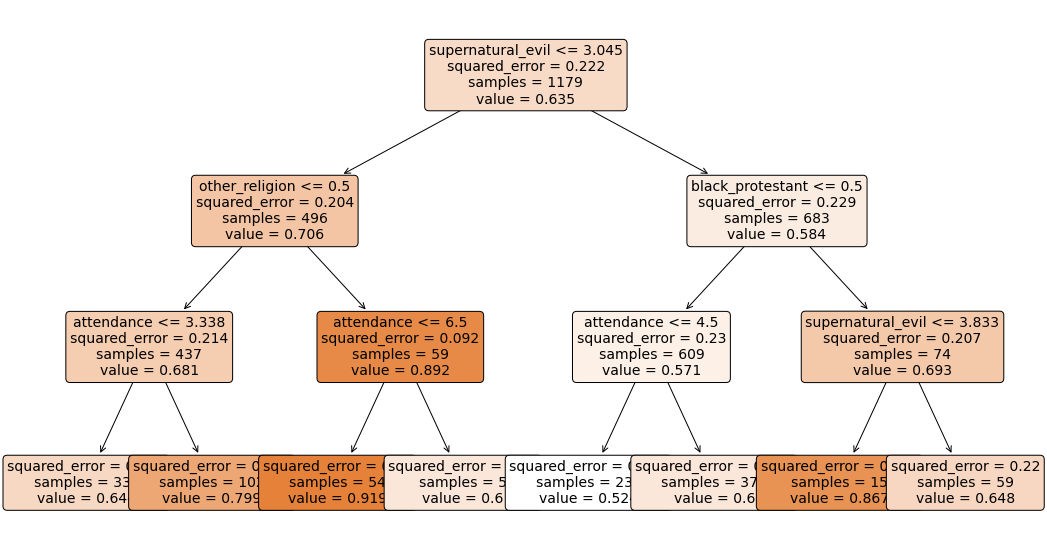

Tree for variable ammo_clips
DecisionTreeRegressor(max_depth=1)
{'max_depth': 1}
-0.03174354410674973


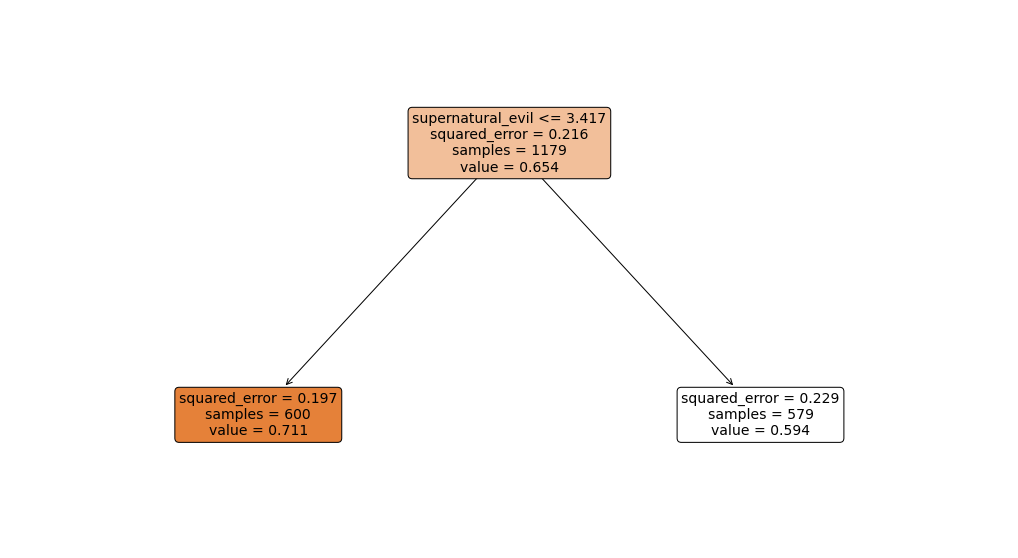

Tree for variable handguns
DecisionTreeRegressor(max_depth=3)
{'max_depth': 3}
0.06405629358407905


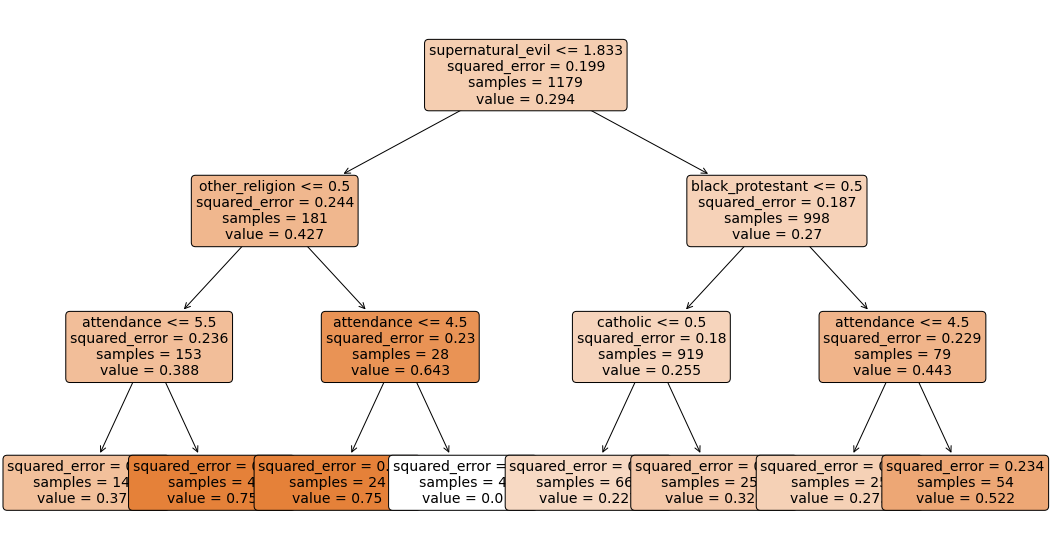

Tree for variable carry_laws
DecisionTreeRegressor(max_depth=3)
{'max_depth': 3}
0.012899575152018783


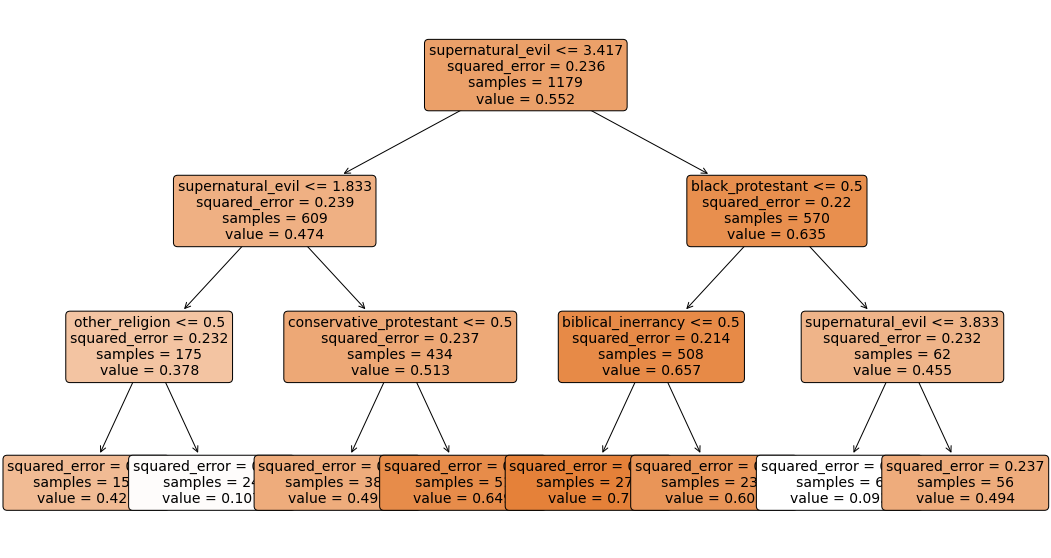

Tree for variable school_security
DecisionTreeRegressor(max_depth=3)
{'max_depth': 3}
0.07171581175949726


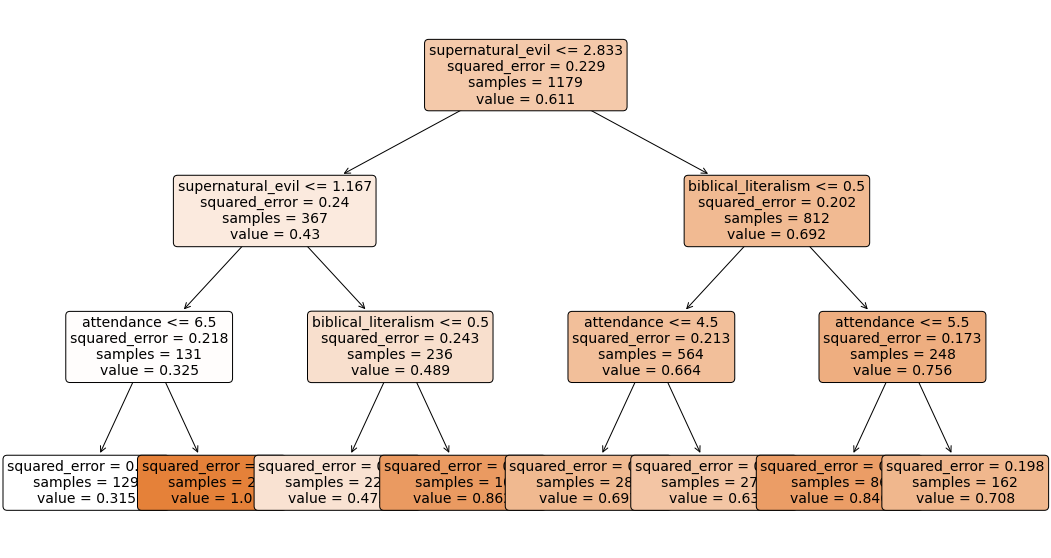

Tree for variable teachers_guns
DecisionTreeRegressor(max_depth=2)
{'max_depth': 2}
0.009806224215606951


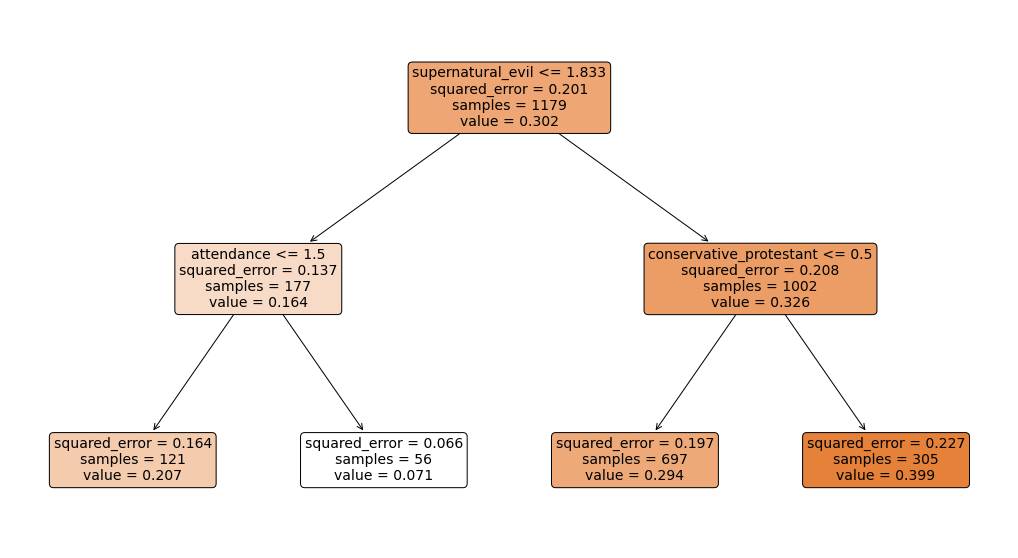

Tree for variable gun_safety
DecisionTreeRegressor(max_depth=1)
{'max_depth': 1}
-0.004417032543442945


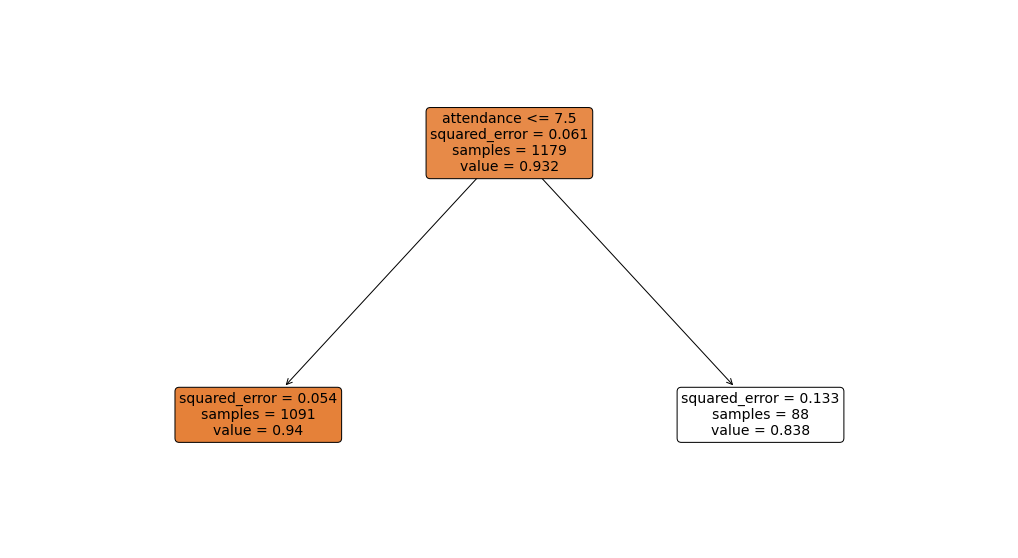

Tree for variable mental_health_screening
DecisionTreeRegressor(max_depth=2)
{'max_depth': 2}
0.0019320421780548713


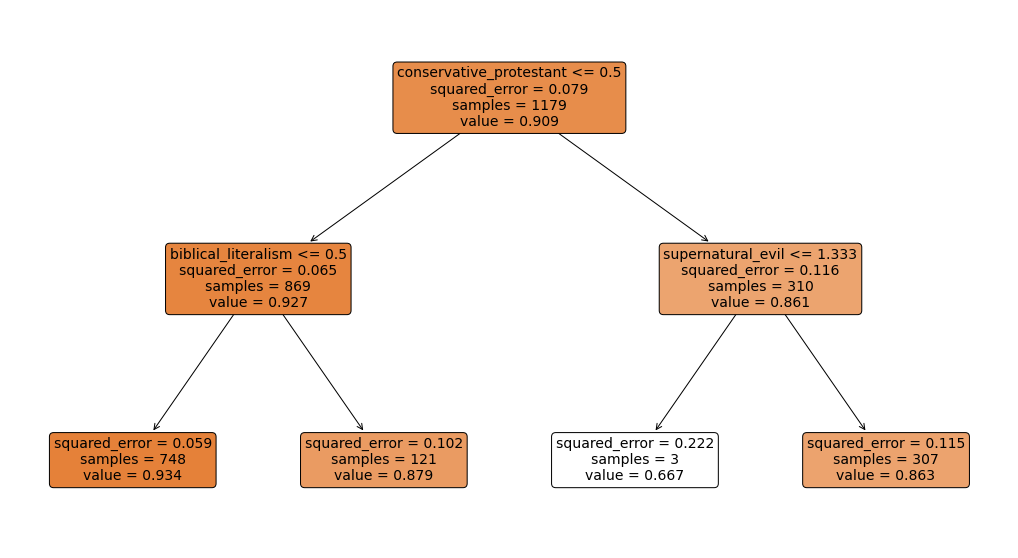

In [51]:
make_regression_trees(independent_variables1)

Scores are low. We notice, though, that `supernatural_evil`, the focal variable, appears in almost all trees. <br>
We will continue to see scores for all independent variables.

Tree for variable semi_auto_guns
DecisionTreeRegressor(max_depth=4)
{'max_depth': 4}
0.1430031067659584


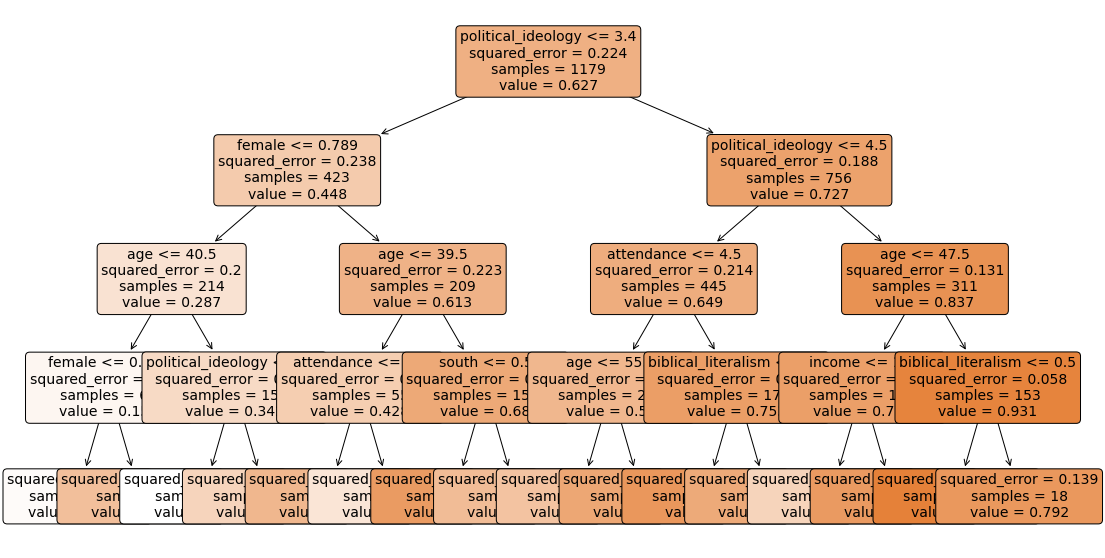

Tree for variable ammo_clips
DecisionTreeRegressor(max_depth=4)
{'max_depth': 4}
0.0025326643462937337


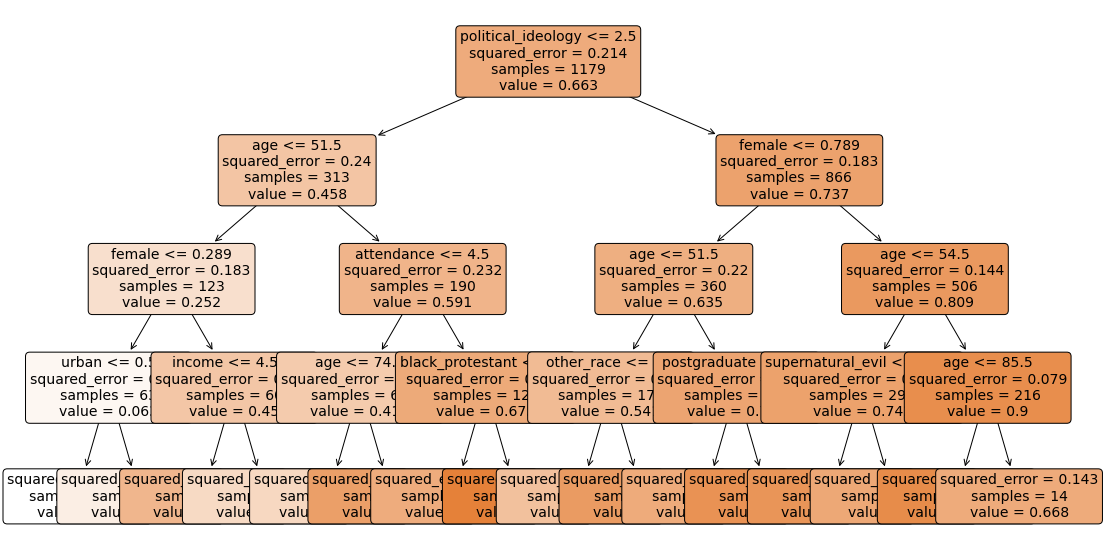

Tree for variable handguns
DecisionTreeRegressor(max_depth=2)
{'max_depth': 2}
0.05018519664962373


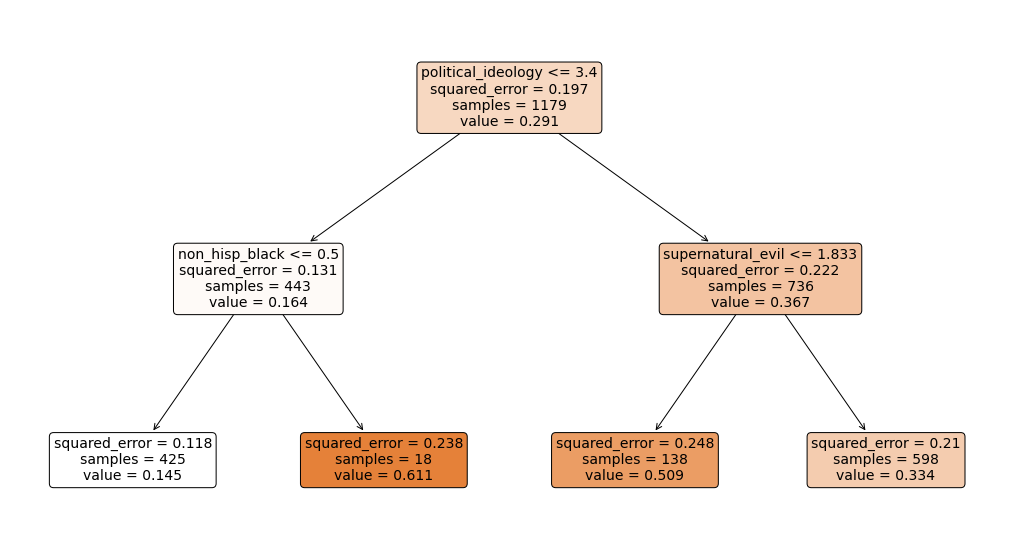

Tree for variable carry_laws
DecisionTreeRegressor(max_depth=3)
{'max_depth': 3}
0.10188006908506109


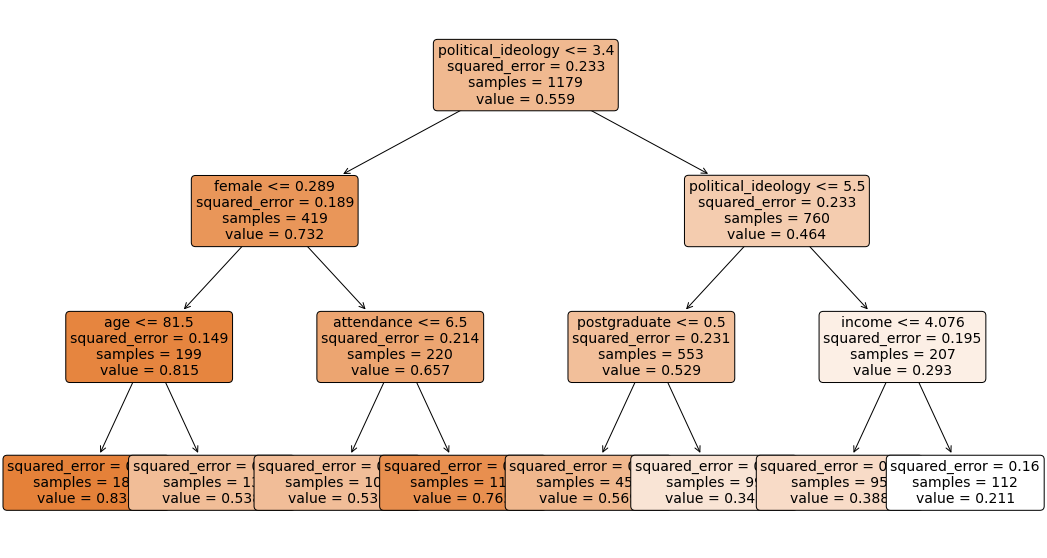

Tree for variable school_security
DecisionTreeRegressor(max_depth=3)
{'max_depth': 3}
0.11305888882566517


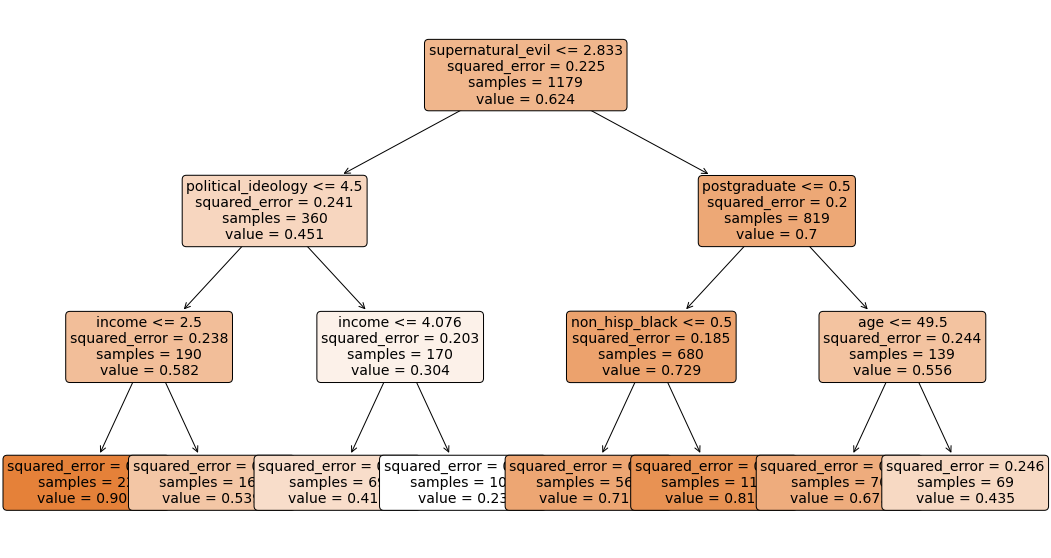

Tree for variable teachers_guns
DecisionTreeRegressor(max_depth=2)
{'max_depth': 2}
0.09550518897506699


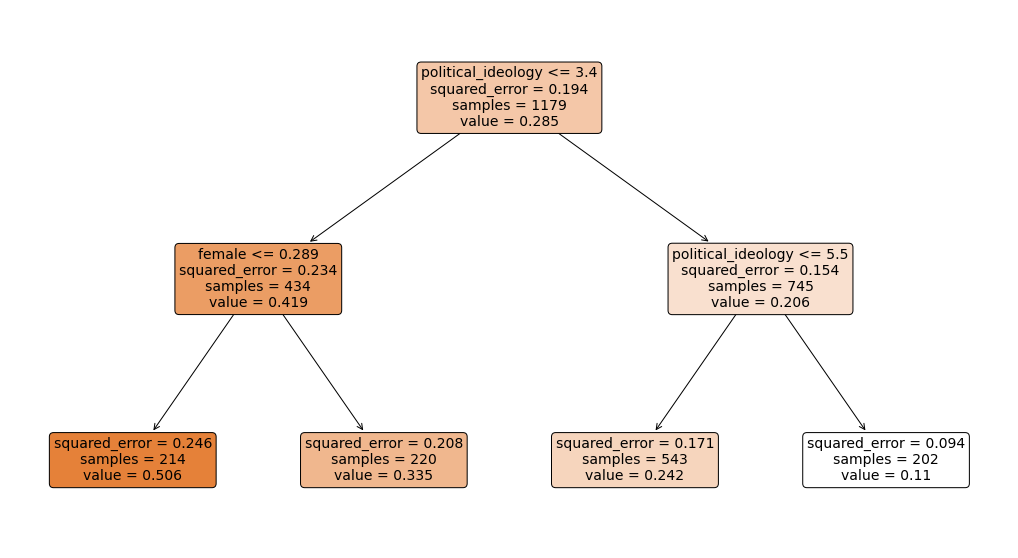

Tree for variable gun_safety
DecisionTreeRegressor(max_depth=1)
{'max_depth': 1}
-0.020246979435292634


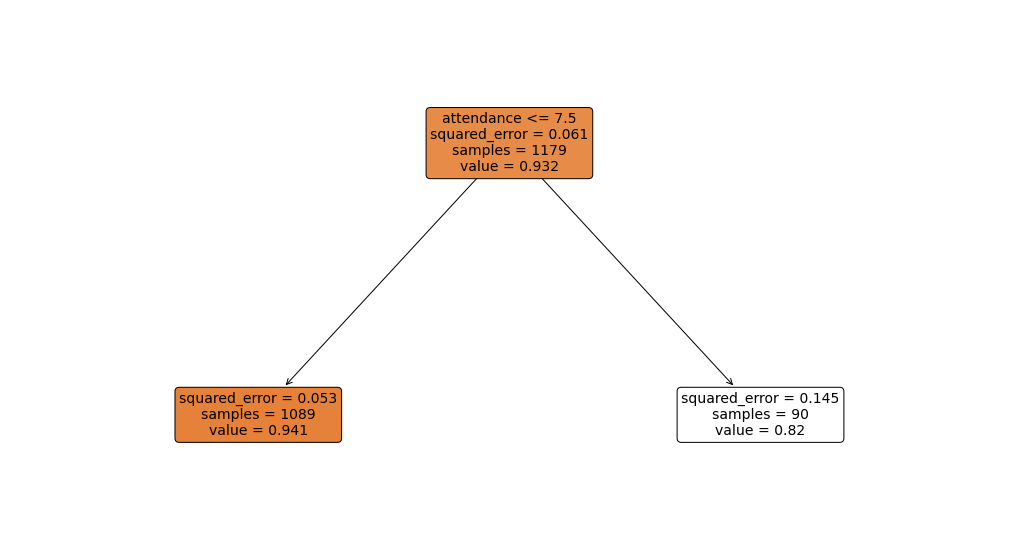

Tree for variable mental_health_screening
DecisionTreeRegressor(max_depth=2)
{'max_depth': 2}
-0.020895908419495735


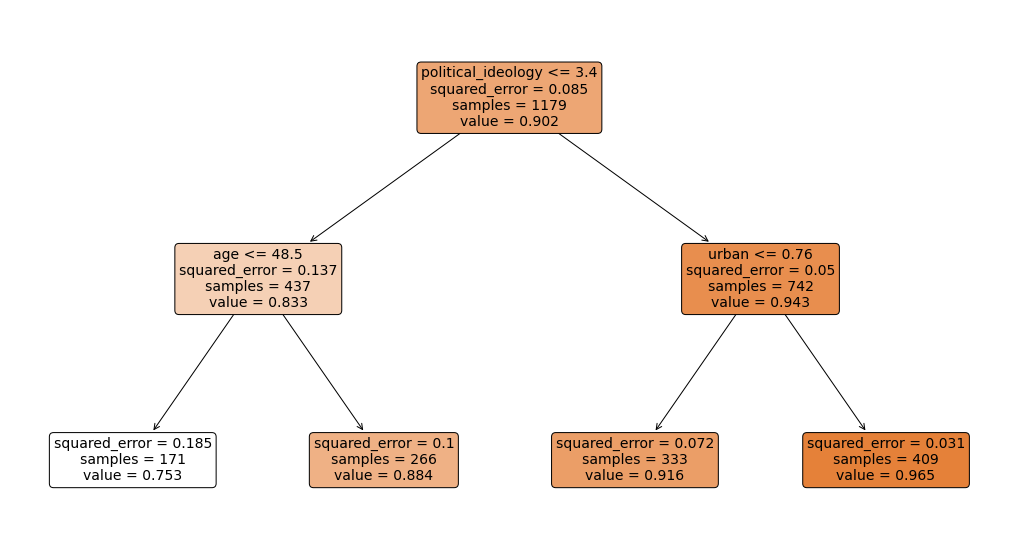

In [52]:
make_regression_trees(independent_variables2)

Some scores have improved by adding more variables. We see that `political_ideology` is a strong predictor and appears in every tree. `female` is also a predictor, as we had discovered from regressions.<br> 
Next, we will try random forests to see whether there is room for further improvement.

In [53]:
from sklearn.ensemble import RandomForestRegressor

def make_random_forests(independent):
    for dependent in dependent_variables:
        x_train, x_test, y_train, y_test = train_test_split(selected_vars[independent].values, selected_vars \
            [dependent].values, test_size=0.25)
        print("Forest for variable", dependent)

        forest = RandomForestRegressor(n_estimators=1000, max_depth=None)

        fitted = forest.fit(x_train, y_train)

        scores = -cross_val_score(fitted, x_test, y_test, cv=10, 
                          scoring="neg_mean_absolute_error")
        print(scores.mean())     

In [54]:
make_random_forests(independent_variables1)

Forest for variable semi_auto_guns
0.4476507624373924
Forest for variable ammo_clips
0.42607036296558515
Forest for variable handguns
0.399020383726262
Forest for variable carry_laws
0.47026785751039474
Forest for variable school_security
0.4140539446978342
Forest for variable teachers_guns
0.3876248967476962
Forest for variable gun_safety
0.13871586799540264
Forest for variable mental_health_screening
0.180894456233516


If we try without negating, we get negative results. We get high MSE, so Random Trees are not a good estimator here. We will try with more variables to see if this decreases.

In [55]:
make_random_forests(independent_variables2)

Forest for variable semi_auto_guns
0.34954468746799117
Forest for variable ammo_clips
0.3745743617911163
Forest for variable handguns
0.35779181964160645
Forest for variable carry_laws
0.41972713109017035
Forest for variable school_security
0.42466991471387316
Forest for variable teachers_guns
0.3547467134649482
Forest for variable gun_safety
0.17905560569518433
Forest for variable mental_health_screening
0.1826294704755128


Results have improven, however we still get poor predictions.

The final library we will try is XGBoost.

In [56]:
import xgboost as xgb

def xgboost(independent):
    for dependent in dependent_variables:
        print("Variable", dependent)
        x_train, x_test, y_train, y_test = train_test_split(selected_vars[independent].values, selected_vars \
            [dependent].values, test_size=0.25)
        xgb_reg = xgb.XGBRegressor()
        xgb_reg.fit(x_train, y_train)
        preds = xgb_reg.predict(x_test)
        print(f'Mean absolute error {mean_absolute_error(y_test, preds)}')

        fig = plt.figure(figsize=(8, 6))
        xgb_reg.get_booster().feature_names = independent
        xgb.plot_importance(xgb_reg, ax = fig.gca())

Variable semi_auto_guns
Mean absolute error 0.47136132288313715
Variable ammo_clips
Mean absolute error 0.43230436796547783
Variable handguns
Mean absolute error 0.3907738495520444
Variable carry_laws
Mean absolute error 0.47324954290950233
Variable school_security
Mean absolute error 0.4313348025425904
Variable teachers_guns
Mean absolute error 0.4320585535955313
Variable gun_safety
Mean absolute error 0.14719792659376446
Variable mental_health_screening
Mean absolute error 0.16883855338537776


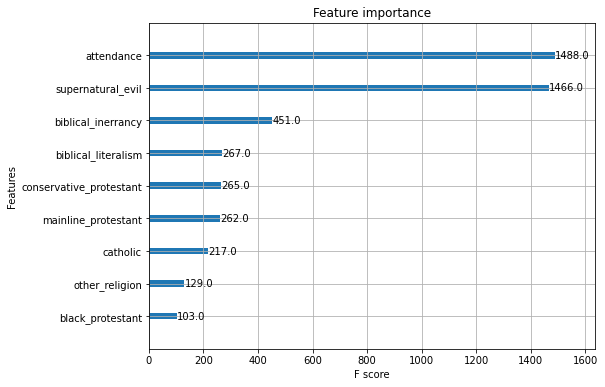

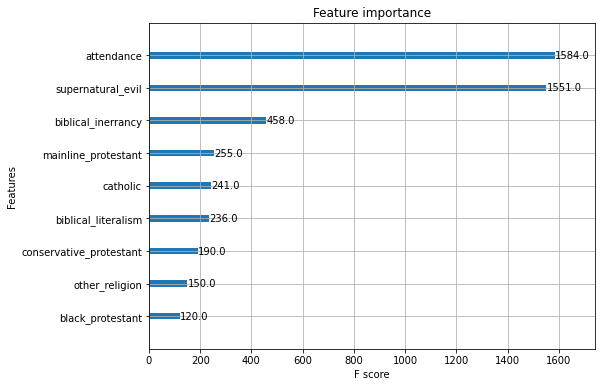

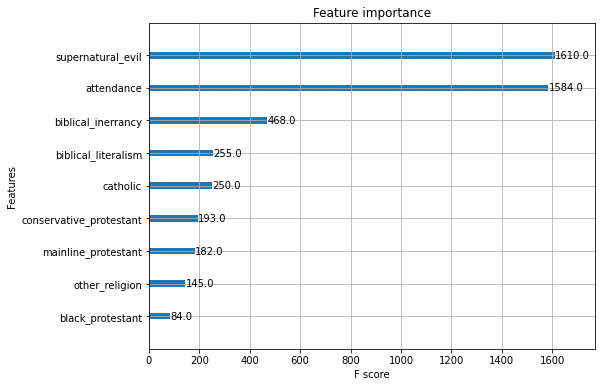

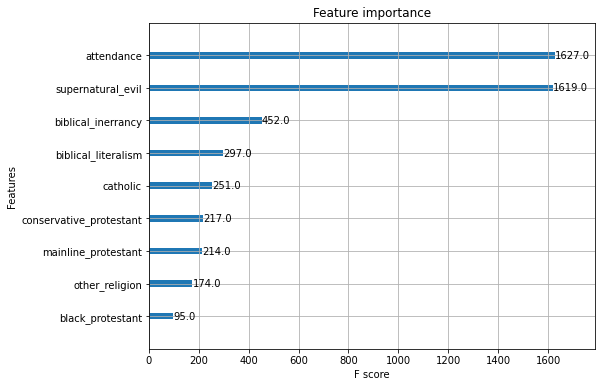

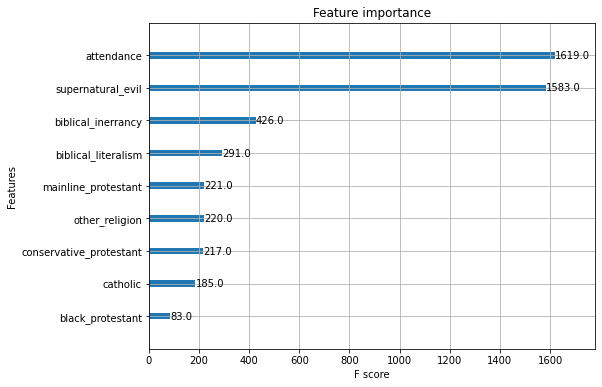

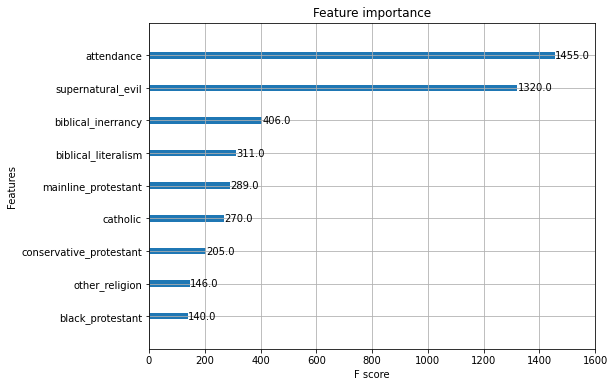

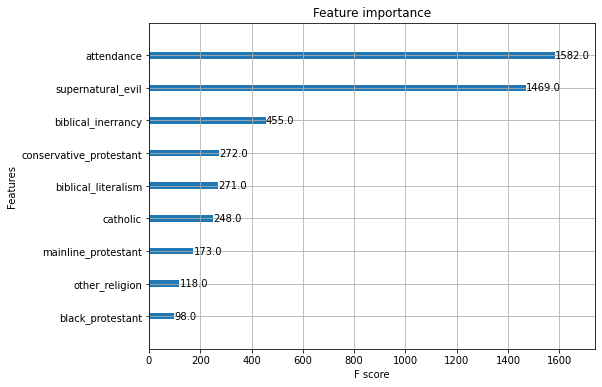

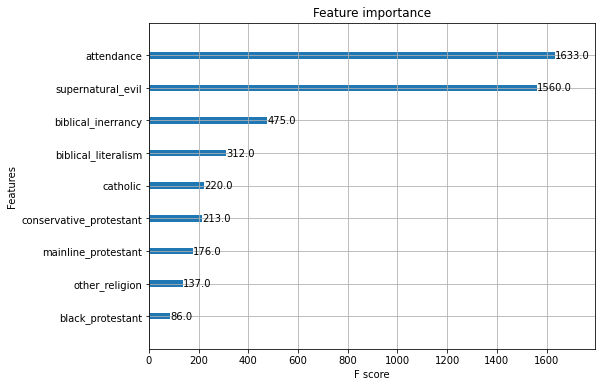

In [57]:
xgboost(independent_variables1)

We get poor results again. However, we see that the results are greatky influenced by the supernatural evil metric. We will finally run for all variables:

Variable semi_auto_guns
Mean absolute error 0.3927027366170729
Variable ammo_clips
Mean absolute error 0.3751425710731866
Variable handguns
Mean absolute error 0.3683215680661139
Variable carry_laws
Mean absolute error 0.41689006929172023
Variable school_security
Mean absolute error 0.40817715622882805
Variable teachers_guns
Mean absolute error 0.39461553679374123
Variable gun_safety
Mean absolute error 0.16497049332258187
Variable mental_health_screening
Mean absolute error 0.19482867603875234


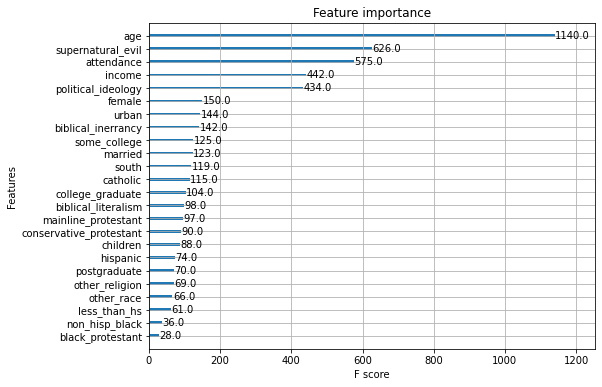

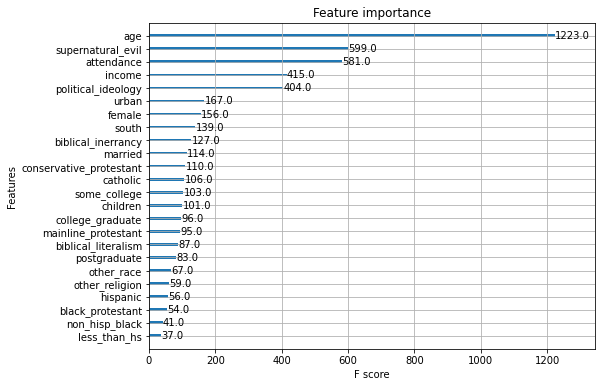

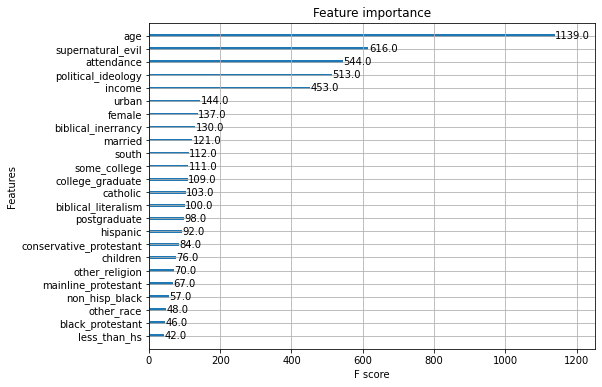

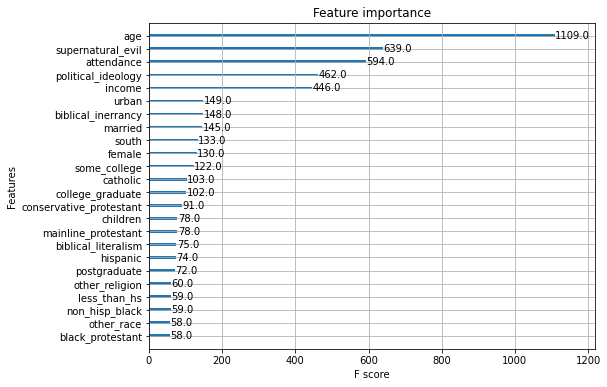

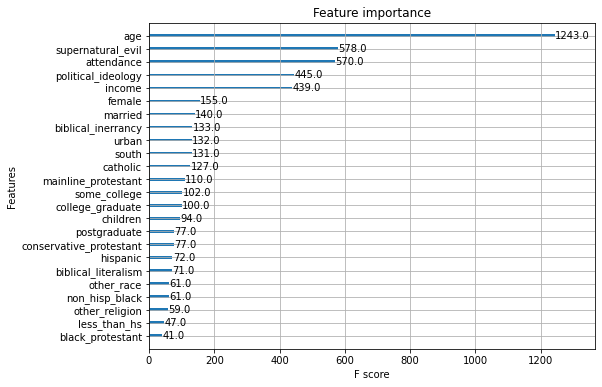

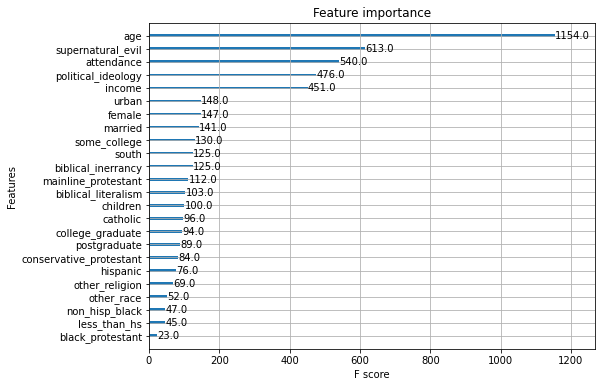

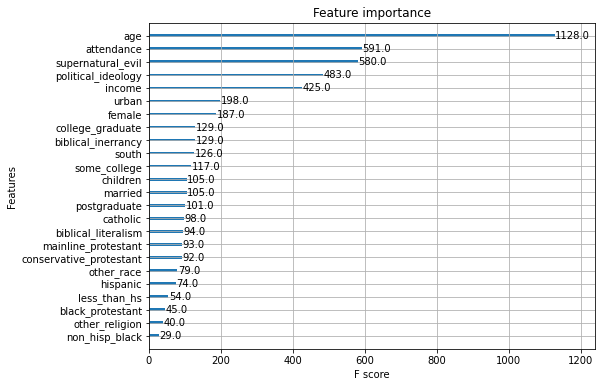

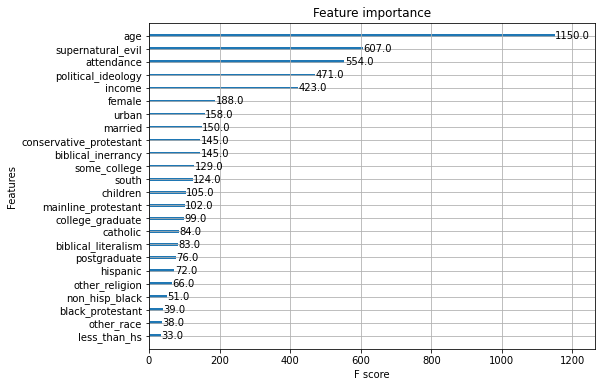

In [58]:
xgboost(independent_variables2)

We must not be surprised that we get such poor results, since linear regressions had also low R-squares. Thus, there is not enough evidence that these predictors are good and this gets clearer with trees.